# EXOPLANETS CLASSIFICATION

Practical Exercises with Machine Learning Algorithms

## Instructions

It might be necessary to normalize the data and test different hyperparameters of the methods to obtain good results.

The evaluation should be done using the accuracy metric and cross-validation with k-fold 5.

In the end, you should compare the performance of the methods including the ROC curve and precision and recall metrics.



## Importing packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, auc, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay


## Importing Data File

Data taken from the NASA Exoplanet Archive (https://exoplanetarchive.ipac.caltech.edu/), stored in my github.


In [2]:
# csv_file = '/content/drive/MyDrive/Mestrado/ML/koi_data.csv' #Enter data path
csv_file = 'https://raw.githubusercontent.com/brunoaugustoam/ExerciciosML/main/koi_data.csv'
df = pd.read_csv(csv_file, sep=',')
df

kepoi_name koi_disposition  koi_period  koi_impact  koi_duration  \
0     K00752.01       CONFIRMED     9.48804       0.146       2.95750   
1     K00752.02       CONFIRMED    54.41838       0.586       4.50700   
2     K00754.01  FALSE POSITIVE     1.73695       1.276       2.40641   
3     K00755.01       CONFIRMED     2.52559       0.701       1.65450   
4     K00114.01  FALSE POSITIVE     7.36179       1.169       5.02200   
...         ...             ...         ...         ...           ...   
5197  K08198.01  FALSE POSITIVE   373.89398       0.963      27.66000   
5198  K07984.01  FALSE POSITIVE     8.58987       0.765       4.80600   
5199  K07985.01  FALSE POSITIVE     0.52770       1.252       3.22210   
5200  K07987.01  FALSE POSITIVE     0.68140       0.147       0.86500   
5201  K07989.01  FALSE POSITIVE     4.85603       0.134       3.07800   

      koi_depth  koi_ror  koi_srho  koi_prad  koi_sma  ...  koi_fwm_srao  \
0         615.8  0.02234   3.20796      2.26   0.0853  ...         0.430   
1         874.8  0.02795   3.02368      2.83   0.2734  ...        -0.630   
2        8079.2  0.38739   0.22080     33.46   0.0267  ...        -0.111   
3         603.3  0.02406   1.98635      2.75   0.0374  ...        -0.010   
4         233.7  0.18339   0.00485     39.21   0.0820  ...       -13.450   
...         ...      ...       ...       ...      ...  ...           ...   
5197      730.0  0.03288   0.00771      2.51   0.8885  ...        -1.000   
5198       87.7  0.00936   0.18863      1.11   0.0779  ...         1.100   
5199     1579.2  0.29763   0.16318     29.35   0.0128  ...         0.792   
5200      103.6  0.00944   8.97692      1.07   0.0157  ...         7.200   
5201       76.7  0.00808   1.40645      1.05   0.0606  ...         2.900   

      koi_fwm_sdeco  koi_fwm_prao  koi_fwm_pdeco  koi_dicco_mra  \
0             0.940      -0.00020       -0.00055         -0.010   
1             1.230       0.00066       -0.00105          0.390   
2             0.002       0.00302       -0.00142         -0.249   
3             0.230       0.00008       -0.00007          0.030   
4            24.090       0.00303       -0.00555         -4.506   
...             ...           ...            ...            ...   
5197         -0.300       0.00060        0.00030          2.360   
5198          1.200      -0.00008       -0.00010          1.260   
5199         -0.484      -0.00024        0.00018          2.132   
5200         -5.600      -0.00072        0.00050          3.410   
5201          8.900      -0.00023       -0.00070          1.020   

      koi_dicco_mdec  koi_dicco_msky  koi_dikco_mra  koi_dikco_mdec  \
0              0.200           0.200          0.080           0.310   
1              0.000           0.390          0.490           0.120   
2              0.147           0.289         -0.257           0.099   
3             -0.090           0.100          0.070           0.020   
4              7.710           8.930         -4.537           7.713   
...              ...             ...            ...             ...   
5197          -0.990           2.550          2.370          -0.910   
5198          -1.200           1.750          1.350          -1.300   
5199          -1.757           2.763          2.344          -1.756   
5200          -3.650           5.000          3.380          -3.890   
5201           3.300           3.400          0.960           3.400   

      koi_dikco_msky  
0              0.320  
1              0.500  
2              0.276  
3              0.070  
4              8.948  
...              ...  
5197           2.540  
5198           1.840  
5199           2.929  
5200           5.160  
5201           3.500  

[5202 rows x 43 columns]

Now let's isolate the data that contains the labels/template, indicating whether or not the KOI is an Exoplanet

In [3]:
Y = df["koi_disposition"]
Y

0            CONFIRMED
1            CONFIRMED
2       FALSE POSITIVE
3            CONFIRMED
4       FALSE POSITIVE
             ...      
5197    FALSE POSITIVE
5198    FALSE POSITIVE
5199    FALSE POSITIVE
5200    FALSE POSITIVE
5201    FALSE POSITIVE
Name: koi_disposition, Length: 5202, dtype: object

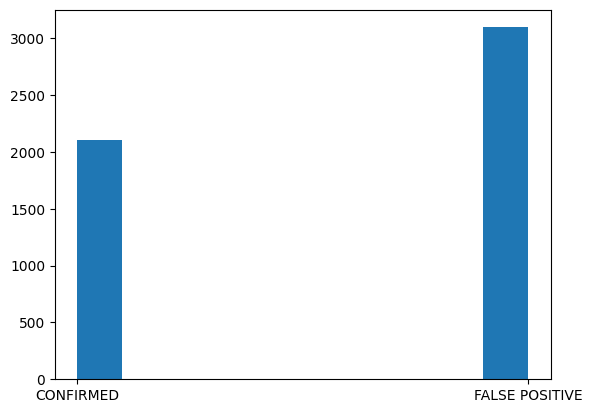

In [4]:
plt.hist(Y)
plt.show()

Now isolating the features as the remaining columns

In [5]:
X = df[df.columns[2:]]
X

koi_period  koi_impact  koi_duration  koi_depth  koi_ror  koi_srho  \
0        9.48804       0.146       2.95750      615.8  0.02234   3.20796   
1       54.41838       0.586       4.50700      874.8  0.02795   3.02368   
2        1.73695       1.276       2.40641     8079.2  0.38739   0.22080   
3        2.52559       0.701       1.65450      603.3  0.02406   1.98635   
4        7.36179       1.169       5.02200      233.7  0.18339   0.00485   
...          ...         ...           ...        ...      ...       ...   
5197   373.89398       0.963      27.66000      730.0  0.03288   0.00771   
5198     8.58987       0.765       4.80600       87.7  0.00936   0.18863   
5199     0.52770       1.252       3.22210     1579.2  0.29763   0.16318   
5200     0.68140       0.147       0.86500      103.6  0.00944   8.97692   
5201     4.85603       0.134       3.07800       76.7  0.00808   1.40645   

      koi_prad  koi_sma  koi_incl  koi_teq  ...  koi_fwm_srao  koi_fwm_sdeco  \
0         2.26   0.0853     89.66    793.0  ...         0.430          0.940   
1         2.83   0.2734     89.57    443.0  ...        -0.630          1.230   
2        33.46   0.0267     67.09   1395.0  ...        -0.111          0.002   
3         2.75   0.0374     85.41   1406.0  ...        -0.010          0.230   
4        39.21   0.0820     60.92   1342.0  ...       -13.450         24.090   
...        ...      ...       ...      ...  ...           ...            ...   
5197      2.51   0.8885     88.57    206.0  ...        -1.000         -0.300   
5198      1.11   0.0779     85.14    929.0  ...         1.100          1.200   
5199     29.35   0.0128     20.78   2088.0  ...         0.792         -0.484   
5200      1.07   0.0157     88.60   2218.0  ...         7.200         -5.600   
5201      1.05   0.0606     89.36   1266.0  ...         2.900          8.900   

      koi_fwm_prao  koi_fwm_pdeco  koi_dicco_mra  koi_dicco_mdec  \
0         -0.00020       -0.00055         -0.010           0.200   
1          0.00066       -0.00105          0.390           0.000   
2          0.00302       -0.00142         -0.249           0.147   
3          0.00008       -0.00007          0.030          -0.090   
4          0.00303       -0.00555         -4.506           7.710   
...            ...            ...            ...             ...   
5197       0.00060        0.00030          2.360          -0.990   
5198      -0.00008       -0.00010          1.260          -1.200   
5199      -0.00024        0.00018          2.132          -1.757   
5200      -0.00072        0.00050          3.410          -3.650   
5201      -0.00023       -0.00070          1.020           3.300   

      koi_dicco_msky  koi_dikco_mra  koi_dikco_mdec  koi_dikco_msky  
0              0.200          0.080           0.310           0.320  
1              0.390          0.490           0.120           0.500  
2              0.289         -0.257           0.099           0.276  
3              0.100          0.070           0.020           0.070  
4              8.930         -4.537           7.713           8.948  
...              ...            ...             ...             ...  
5197           2.550          2.370          -0.910           2.540  
5198           1.750          1.350          -1.300           1.840  
5199           2.763          2.344          -1.756           2.929  
5200           5.000          3.380          -3.890           5.160  
5201           3.400          0.960           3.400           3.500  

[5202 rows x 41 columns]

Checking the presence of missing values in the database.

There is not. This exercise is focused in fitting models and evaluating the results, instead of cleaning data

In [6]:
df.count()

kepoi_name          5202
koi_disposition     5202
koi_period          5202
koi_impact          5202
koi_duration        5202
koi_depth           5202
koi_ror             5202
koi_srho            5202
koi_prad            5202
koi_sma             5202
koi_incl            5202
koi_teq             5202
koi_insol           5202
koi_dor             5202
koi_max_sngle_ev    5202
koi_max_mult_ev     5202
koi_model_snr       5202
koi_steff           5202
koi_slogg           5202
koi_smet            5202
koi_srad            5202
koi_smass           5202
koi_kepmag          5202
koi_gmag            5202
koi_rmag            5202
koi_imag            5202
koi_zmag            5202
koi_jmag            5202
koi_hmag            5202
koi_kmag            5202
koi_fwm_stat_sig    5202
koi_fwm_sra         5202
koi_fwm_sdec        5202
koi_fwm_srao        5202
koi_fwm_sdeco       5202
koi_fwm_prao        5202
koi_fwm_pdeco       5202
koi_dicco_mra       5202
koi_dicco_mdec      5202
koi_dicco_msky      5202


In [7]:
df.isna().sum()

kepoi_name          0
koi_disposition     0
koi_period          0
koi_impact          0
koi_duration        0
koi_depth           0
koi_ror             0
koi_srho            0
koi_prad            0
koi_sma             0
koi_incl            0
koi_teq             0
koi_insol           0
koi_dor             0
koi_max_sngle_ev    0
koi_max_mult_ev     0
koi_model_snr       0
koi_steff           0
koi_slogg           0
koi_smet            0
koi_srad            0
koi_smass           0
koi_kepmag          0
koi_gmag            0
koi_rmag            0
koi_imag            0
koi_zmag            0
koi_jmag            0
koi_hmag            0
koi_kmag            0
koi_fwm_stat_sig    0
koi_fwm_sra         0
koi_fwm_sdec        0
koi_fwm_srao        0
koi_fwm_sdeco       0
koi_fwm_prao        0
koi_fwm_pdeco       0
koi_dicco_mra       0
koi_dicco_mdec      0
koi_dicco_msky      0
koi_dikco_mra       0
koi_dikco_mdec      0
koi_dikco_msky      0
dtype: int64

In [8]:
df.isna().sum().sum()

0

## MinMax Scaler

We are going to scale our data using the Mix Max Scaler to prevent the scales of the data from getting in the way of fitting the models.

As stated in [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), MinMaxScaler doesn’t reduce the effect of outliers, but it linearly scales them down into a fixed range, where the largest occurring data point corresponds to the maximum value and the smallest one corresponds to the minimum value.

In [9]:
X

koi_period  koi_impact  koi_duration  koi_depth  koi_ror  koi_srho  \
0        9.48804       0.146       2.95750      615.8  0.02234   3.20796   
1       54.41838       0.586       4.50700      874.8  0.02795   3.02368   
2        1.73695       1.276       2.40641     8079.2  0.38739   0.22080   
3        2.52559       0.701       1.65450      603.3  0.02406   1.98635   
4        7.36179       1.169       5.02200      233.7  0.18339   0.00485   
...          ...         ...           ...        ...      ...       ...   
5197   373.89398       0.963      27.66000      730.0  0.03288   0.00771   
5198     8.58987       0.765       4.80600       87.7  0.00936   0.18863   
5199     0.52770       1.252       3.22210     1579.2  0.29763   0.16318   
5200     0.68140       0.147       0.86500      103.6  0.00944   8.97692   
5201     4.85603       0.134       3.07800       76.7  0.00808   1.40645   

      koi_prad  koi_sma  koi_incl  koi_teq  ...  koi_fwm_srao  koi_fwm_sdeco  \
0         2.26   0.0853     89.66    793.0  ...         0.430          0.940   
1         2.83   0.2734     89.57    443.0  ...        -0.630          1.230   
2        33.46   0.0267     67.09   1395.0  ...        -0.111          0.002   
3         2.75   0.0374     85.41   1406.0  ...        -0.010          0.230   
4        39.21   0.0820     60.92   1342.0  ...       -13.450         24.090   
...        ...      ...       ...      ...  ...           ...            ...   
5197      2.51   0.8885     88.57    206.0  ...        -1.000         -0.300   
5198      1.11   0.0779     85.14    929.0  ...         1.100          1.200   
5199     29.35   0.0128     20.78   2088.0  ...         0.792         -0.484   
5200      1.07   0.0157     88.60   2218.0  ...         7.200         -5.600   
5201      1.05   0.0606     89.36   1266.0  ...         2.900          8.900   

      koi_fwm_prao  koi_fwm_pdeco  koi_dicco_mra  koi_dicco_mdec  \
0         -0.00020       -0.00055         -0.010           0.200   
1          0.00066       -0.00105          0.390           0.000   
2          0.00302       -0.00142         -0.249           0.147   
3          0.00008       -0.00007          0.030          -0.090   
4          0.00303       -0.00555         -4.506           7.710   
...            ...            ...            ...             ...   
5197       0.00060        0.00030          2.360          -0.990   
5198      -0.00008       -0.00010          1.260          -1.200   
5199      -0.00024        0.00018          2.132          -1.757   
5200      -0.00072        0.00050          3.410          -3.650   
5201      -0.00023       -0.00070          1.020           3.300   

      koi_dicco_msky  koi_dikco_mra  koi_dikco_mdec  koi_dikco_msky  
0              0.200          0.080           0.310           0.320  
1              0.390          0.490           0.120           0.500  
2              0.289         -0.257           0.099           0.276  
3              0.100          0.070           0.020           0.070  
4              8.930         -4.537           7.713           8.948  
...              ...            ...             ...             ...  
5197           2.550          2.370          -0.910           2.540  
5198           1.750          1.350          -1.300           1.840  
5199           2.763          2.344          -1.756           2.929  
5200           5.000          3.380          -3.890           5.160  
5201           3.400          0.960           3.400           3.500  

[5202 rows x 41 columns]

In [10]:
X_pre = X.values
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_pre)
X_minmax = pd.DataFrame(X_scaled)
X_minmax

0         1         2         3         4         5         6   \
0     0.008573  0.001448  0.020608  0.000712  0.000211  0.003492  0.000011   
1     0.050528  0.005813  0.031801  0.001011  0.000267  0.003291  0.000014   
2     0.001335  0.012658  0.016627  0.009347  0.003866  0.000240  0.000167   
3     0.002072  0.006954  0.011196  0.000697  0.000228  0.002162  0.000013   
4     0.006588  0.011597  0.035521  0.000269  0.001823  0.000005  0.000195   
...        ...       ...       ...       ...       ...       ...       ...   
5197  0.348845  0.009553  0.199049  0.000844  0.000316  0.000008  0.000012   
5198  0.007734  0.007589  0.033961  0.000101  0.000081  0.000205  0.000005   
5199  0.000206  0.012420  0.022520  0.001826  0.002967  0.000178  0.000146   
5200  0.000350  0.001458  0.005493  0.000119  0.000082  0.009771  0.000005   
5201  0.004248  0.001329  0.021479  0.000088  0.000068  0.001531  0.000005   

            7         8         9   ...        31        32        33  \
0     0.038524  0.996124  0.072275  ...  0.739274  0.802901  0.770674   
1     0.131308  0.995097  0.036189  ...  0.736435  0.803485  0.770840   
2     0.009619  0.738798  0.134344  ...  0.737825  0.801011  0.771295   
3     0.014897  0.947668  0.135478  ...  0.738095  0.801471  0.770728   
4     0.036896  0.668453  0.128879  ...  0.702100  0.849537  0.771297   
...        ...       ...       ...  ...       ...       ...       ...   
5197  0.434716  0.983696  0.011754  ...  0.735444  0.800403  0.770829   
5198  0.034874  0.944590  0.086298  ...  0.741068  0.803425  0.770697   
5199  0.002762  0.210808  0.205794  ...  0.740243  0.800032  0.770667   
5200  0.004193  0.984038  0.219198  ...  0.757405  0.789726  0.770574   
5201  0.026340  0.992703  0.121043  ...  0.745889  0.818936  0.770669   

            34        35        36        37        38        39        40  
0     0.137836  0.319887  0.735977  0.002257  0.337466  0.713451  0.003571  
1     0.137750  0.325841  0.734043  0.004402  0.343309  0.711688  0.005580  
2     0.137686  0.316329  0.735464  0.003262  0.332664  0.711494  0.003080  
3     0.137919  0.320482  0.733172  0.001129  0.337324  0.710761  0.000781  
4     0.136974  0.252962  0.808607  0.100790  0.271669  0.782124  0.099866  
...        ...       ...       ...       ...       ...       ...       ...  
5197  0.137983  0.355165  0.724468  0.028781  0.370101  0.702134  0.028348  
5198  0.137914  0.338791  0.722437  0.019752  0.355565  0.698516  0.020536  
5199  0.137962  0.351771  0.717050  0.031185  0.369731  0.694286  0.032690  
5200  0.138017  0.370795  0.698743  0.056433  0.384495  0.674490  0.057589  
5201  0.137810  0.335219  0.765957  0.038375  0.350007  0.742115  0.039062  

[5202 rows x 41 columns]

## Split Data with reproducibility

test_size = 0.35 tells us that we will separate 35% of the data for testing and keep 65% for training

In [11]:
seed=29
k_fold = 5
test_size = 0.35

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X_minmax, Y,
                                      test_size=test_size, random_state=seed)


# Note

As we can quickly check, our data does not have all its attributes independent from each other, therefore violating Naive Bayes's premisse. But let us ignore this for this exercise and focus on models and evaluation.

In [13]:
corr = np.round(df.corr(method='pearson'),2)
s = corr.unstack()
so = s.sort_values(kind="quicksort")
so

<ipython-input-13-bcb98fac3029>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = np.round(df.corr(method='pearson'),2)


koi_fwm_pdeco   koi_fwm_prao     -0.77
koi_fwm_prao    koi_fwm_pdeco    -0.77
koi_slogg       koi_smass        -0.70
koi_smass       koi_slogg        -0.70
koi_slogg       koi_srad         -0.64
                                  ... 
koi_imag        koi_zmag          1.00
                koi_imag          1.00
                koi_kepmag        1.00
koi_dikco_mra   koi_dikco_mra     1.00
koi_dikco_msky  koi_dikco_msky    1.00
Length: 1681, dtype: float64

# Naive Bayes, our baseline

[Documentation](https://scikit-learn.org/stable/modules/naive_bayes.html)



Naive Bayes is used as a classifier, in which the class choice is based on the conditional probability of event occurrence, considering independence of events, that is, it assumes that there is no correlation between the chosen attributes, and therefore it is called "Naive", naive. The term "Bayes" comes from Bayes' Theorem, on which the algorithm is based. It is a simple algorithm, with generally good performance, but not optimal for many applications.

The conditional probability of event A occurring is the probability of A occurring, given that another event B has already occurred.

This probability is written in the form:

$ p(A|B) $

Bayes' Theorem for n elements can be written in its expanded form:

$P(y|x1, x2, ... xn) $ = $\frac{P(y)*P(x1, x2, ... xn|y)} {P(x1, x2, ... xn)} $

Because the algorithm assumes that the attributes are independent of each other, the probability of xi given y does not interfere with the value of the other variables e.g. P(x(i+1)∣y). And, since the algorithm inputs (x1,x2...xn) are constants, the theorem is summarized to:

$ P(y∣x1,x2...xn) P(y)∗ \prod_{i=1}^n P(xi|y) $

In this way, the Naive Bayes algorithm will select the y (class) for which the probability of y given the values of X, is maximized, that is:

$ŷ = argmax_{y} P(y) * \prod_{i=1}^n P(xi|y) $

When we look at our data, we see that the attributes are composed of continuous data, not discrete. Therefore, it is appropriate to use the "Gaussian Naive Bayes" algorithm, already implemented in the SciKit Learn library. Let's import it below

For this algorithm, P(xi∣y) is given with the aid of a normalization of the data, in the form:

$P(xi|y)$ = $ \frac{1}{\sqrt{2πσ^2_{y}}}$ * $exp(- \frac{(xi - μ_{y})^2} {2σ^2_{y}}) $
In this context, the mean μ
y
​
  and standard deviation σ
y
​
  are given by the mean and standard deviation of xi given the observations of y.

Additional notes:

* The term "naive" in Naive Bayes refers to the assumption that the attributes are independent of each other. This assumption is often violated in real-world data, but it can still be a good approximation in many cases.
* Gaussian Naive Bayes is a specific type of Naive Bayes algorithm that assumes that the attributes are normally distributed. This assumption is often reasonable for continuous attributes.


### Implementation

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
classifier_gnb = GaussianNB()

In [16]:
# Sklearn has a easy way of performing cross validation with our training data

cv_nb = cross_val_score(classifier_gnb, x_train, y_train, cv=k_fold).mean()
print("Accuracy of Gaussian Naive Bayes for cross-validation with K-fold = 5: {:.2f} %"
        .format(cv_nb*100))

Accuracy of Gaussian Naive Bayes for cross-validation with K-fold = 5: 91.72 %


In [17]:
classifier_gnb.fit(x_train,y_train)

treino_nb = classifier_gnb.score(x_train,y_train)

print("Accuracy of Gaussian Naive Bayes on training data: {:.2f} %"
        .format(treino_nb*100))

Accuracy of Gaussian Naive Bayes on training data: 91.42 %


Now let's check the performance on test data

In [18]:
teste_nb = classifier_gnb.score(x_test,y_test) #Get test score
y_pred = classifier_gnb.predict(x_test) #Get test predicitons
print("Accuracy of Gaussian Naive Bayes on test data: {:.2f} %"
        .format(teste_nb*100))

Accuracy of Gaussian Naive Bayes on test data: 91.21 %


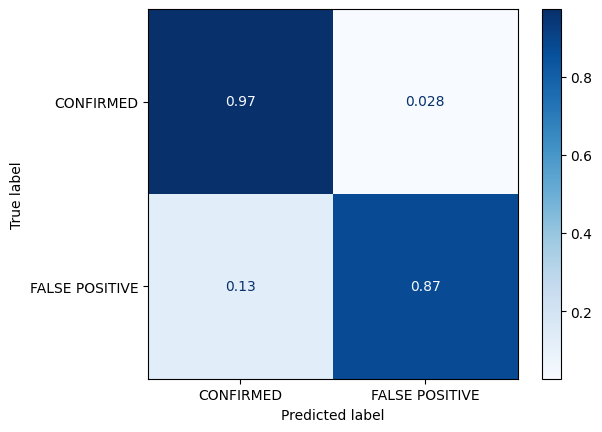

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true',cmap='Blues')
plt.show()

In [20]:
recall_nb = recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision_nb = precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Recall = {:.2f} % | Precision = {:.2f} %".format(recall_nb*100, precision_nb*100))

Recall = 97.23 % | Precision = 83.39 %


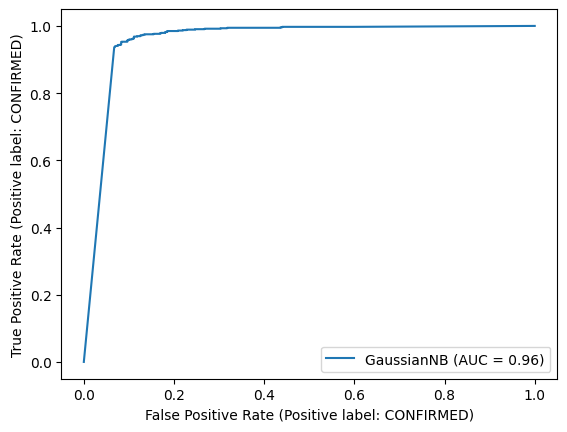

In [21]:
RocCurveDisplay.from_estimator(classifier_gnb,x_test,y_test , pos_label='CONFIRMED')
plt.show()

### Conclusion

Through the plotted values, it is possible to observe some points:

The accuracy values obtained in cross-validation and in the training data had very similar values for all training/test proportions.


Gaussian Naive Bayes accuracy for cross-validation with K-fold=5: 91.72%

Gaussian Naive Bayes accuracy in training data: 91.42%

Gaussian Naive Bayes accuracy in test data: 91.21%

A recall of 97.23% and precision of 83.39% were obtained.

Area under the ROC curve 96%

# Decision Tree

**Task: Vary tree max height ( includes unlimeted)and provide graphical results**

Decision trees are supervised machine learning algorithms that progressively reduce the dataset into smaller groups based on some attribute, ideally, until it is possible to classify these sets by labels.

They are used in both classification and regression problems. They are called classification trees when the data of the dependent variables are categorical (discrete, qualitative) and regression trees when the dependent variables are continuous (numerical, quantitative).

Trees are composed of nodes, branches, and leaves. The nodes are where the attributes are allocated. The branches are generated from the nodes, separating the examples based on a threshold or class of the attribute. The leaves are the outputs of the algorithm, which will be for example classified. From a leaf, no nodes are generated.

From each node, the data are divided in a way to increase homogeneity, that is, to generate groups of data with fewer and fewer mixed classes. The complexity or capacity of the model increases as the height of the tree increases. In the learning process, it is important to balance so that it has enough attributes and nodes to classify the data (avoid underfitting) but without making the tree too specific/complex, losing generalization ability (avoid overfitting).

A procedure used to avoid overfitting is called pruning. It is a technique that reduces the complexity of the model to gain performance in the training data, by removing nodes that are being used to classify noise. They are separated by:

Pre-pruning: It terminates the growth of the tree prematurely.

Post-pruning: It allows the complete growth of the tree, then removes leaves if that removal results in an increase in performance.

For this exercise, since it is a classification task, an algorithm based on the concept of information gain will be used to build the tree. Information gain is given by the decrease in expected entropy when using a given attribute. A commonly used algorithm is ID3 (Interative Dichotomiser), based on information gain, which follows:

Prior

$ Info_{D} = - \sum_{i=1}^m{\log_{2}pi} $

Expected entropy when using a given attribute

$ {Info_{A}(D)} = - \sum_{i=1}^v{\frac {|D|_{j}}{|D|}} * InfoD_{j}$

Information gain of the attribute

$InformationGain(A) = Info(d) - Info_{A}(D) $

Where Info(D) is the average information needed to identify the class in D.

$\frac {|D|_{j}}{|D|} $ serves as a weight for the j−th partition

Info(D) is the expected information that needs to be needed to identify the class in D using A at a node.

The C4.5 algorithm is an evolution of ID3. Its separation procedure is given by:

$ {SplitInfo_{A}(D)} = - \sum_{i=1}^v{\frac {|D|_{j}}{|D|}} $ * $log_{2} {(\frac {|D|_{j}}{|D|})} $

where $\frac {|D|_{j}}{|D|} $ serves as a weight for the j−th partition

v is the number of attributes

The information gain is given by

$ GainRation $ = $ \frac {Ganho(A)}{SplitInfo_{A}(D)}  $

Additional notes:

* The term "entropy" refers to the amount of uncertainty or randomness in a system. In the context of machine learning, entropy is used to measure the uncertainty of a class label.

* The term "information gain" refers to the reduction in entropy that is achieved by using a given attribute to classify the data.

* The term "gain ratio" is a measure of the information gain that is normalized by the complexity of the splitting rule.

## Implementation

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Auxiliary Functions

In [23]:
def cross_val_varying_height(x, y, alturas, cv=5, scoring='accuracy', criterion="entropy"):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in alturas:
        tree_model = DecisionTreeClassifier(max_depth=depth, criterion=criterion)
        cv_scores = cross_val_score(tree_model, x, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(x, y).score(x, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(16,9))
    ax.plot(depths, cv_scores_mean, '-o', label='Mean Accu on Cross-Val', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2) #2 desvios padrões
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='Train Accu', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree Height', fontsize=14)
    ax.set_ylabel('Accu', fontsize=14)
    #ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.grid()
    ax.legend()

### Unlimited Height

In [24]:
tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=seed)

tree_clf = tree_clf.fit(x_train,y_train)

y_pred = tree_clf.predict(x_test)

In [25]:
print("Decision Tree Accuracy on Training Data: {:.2f} %"
        .format(tree_clf.score(x_train,y_train)*100))

Decision Tree Accuracy on Training Data: 100.00 %


In [26]:
print("Decision Tree Accuracy on Test Data: {:.2f} %"
        .format(tree_clf.score(x_test,y_test)*100))


Decision Tree Accuracy on Test Data: 95.33 %


Plotting the tree without height or attribute restrictions. It is a complex tree that is difficult to understand. We will try to simplify it in the next experiments.

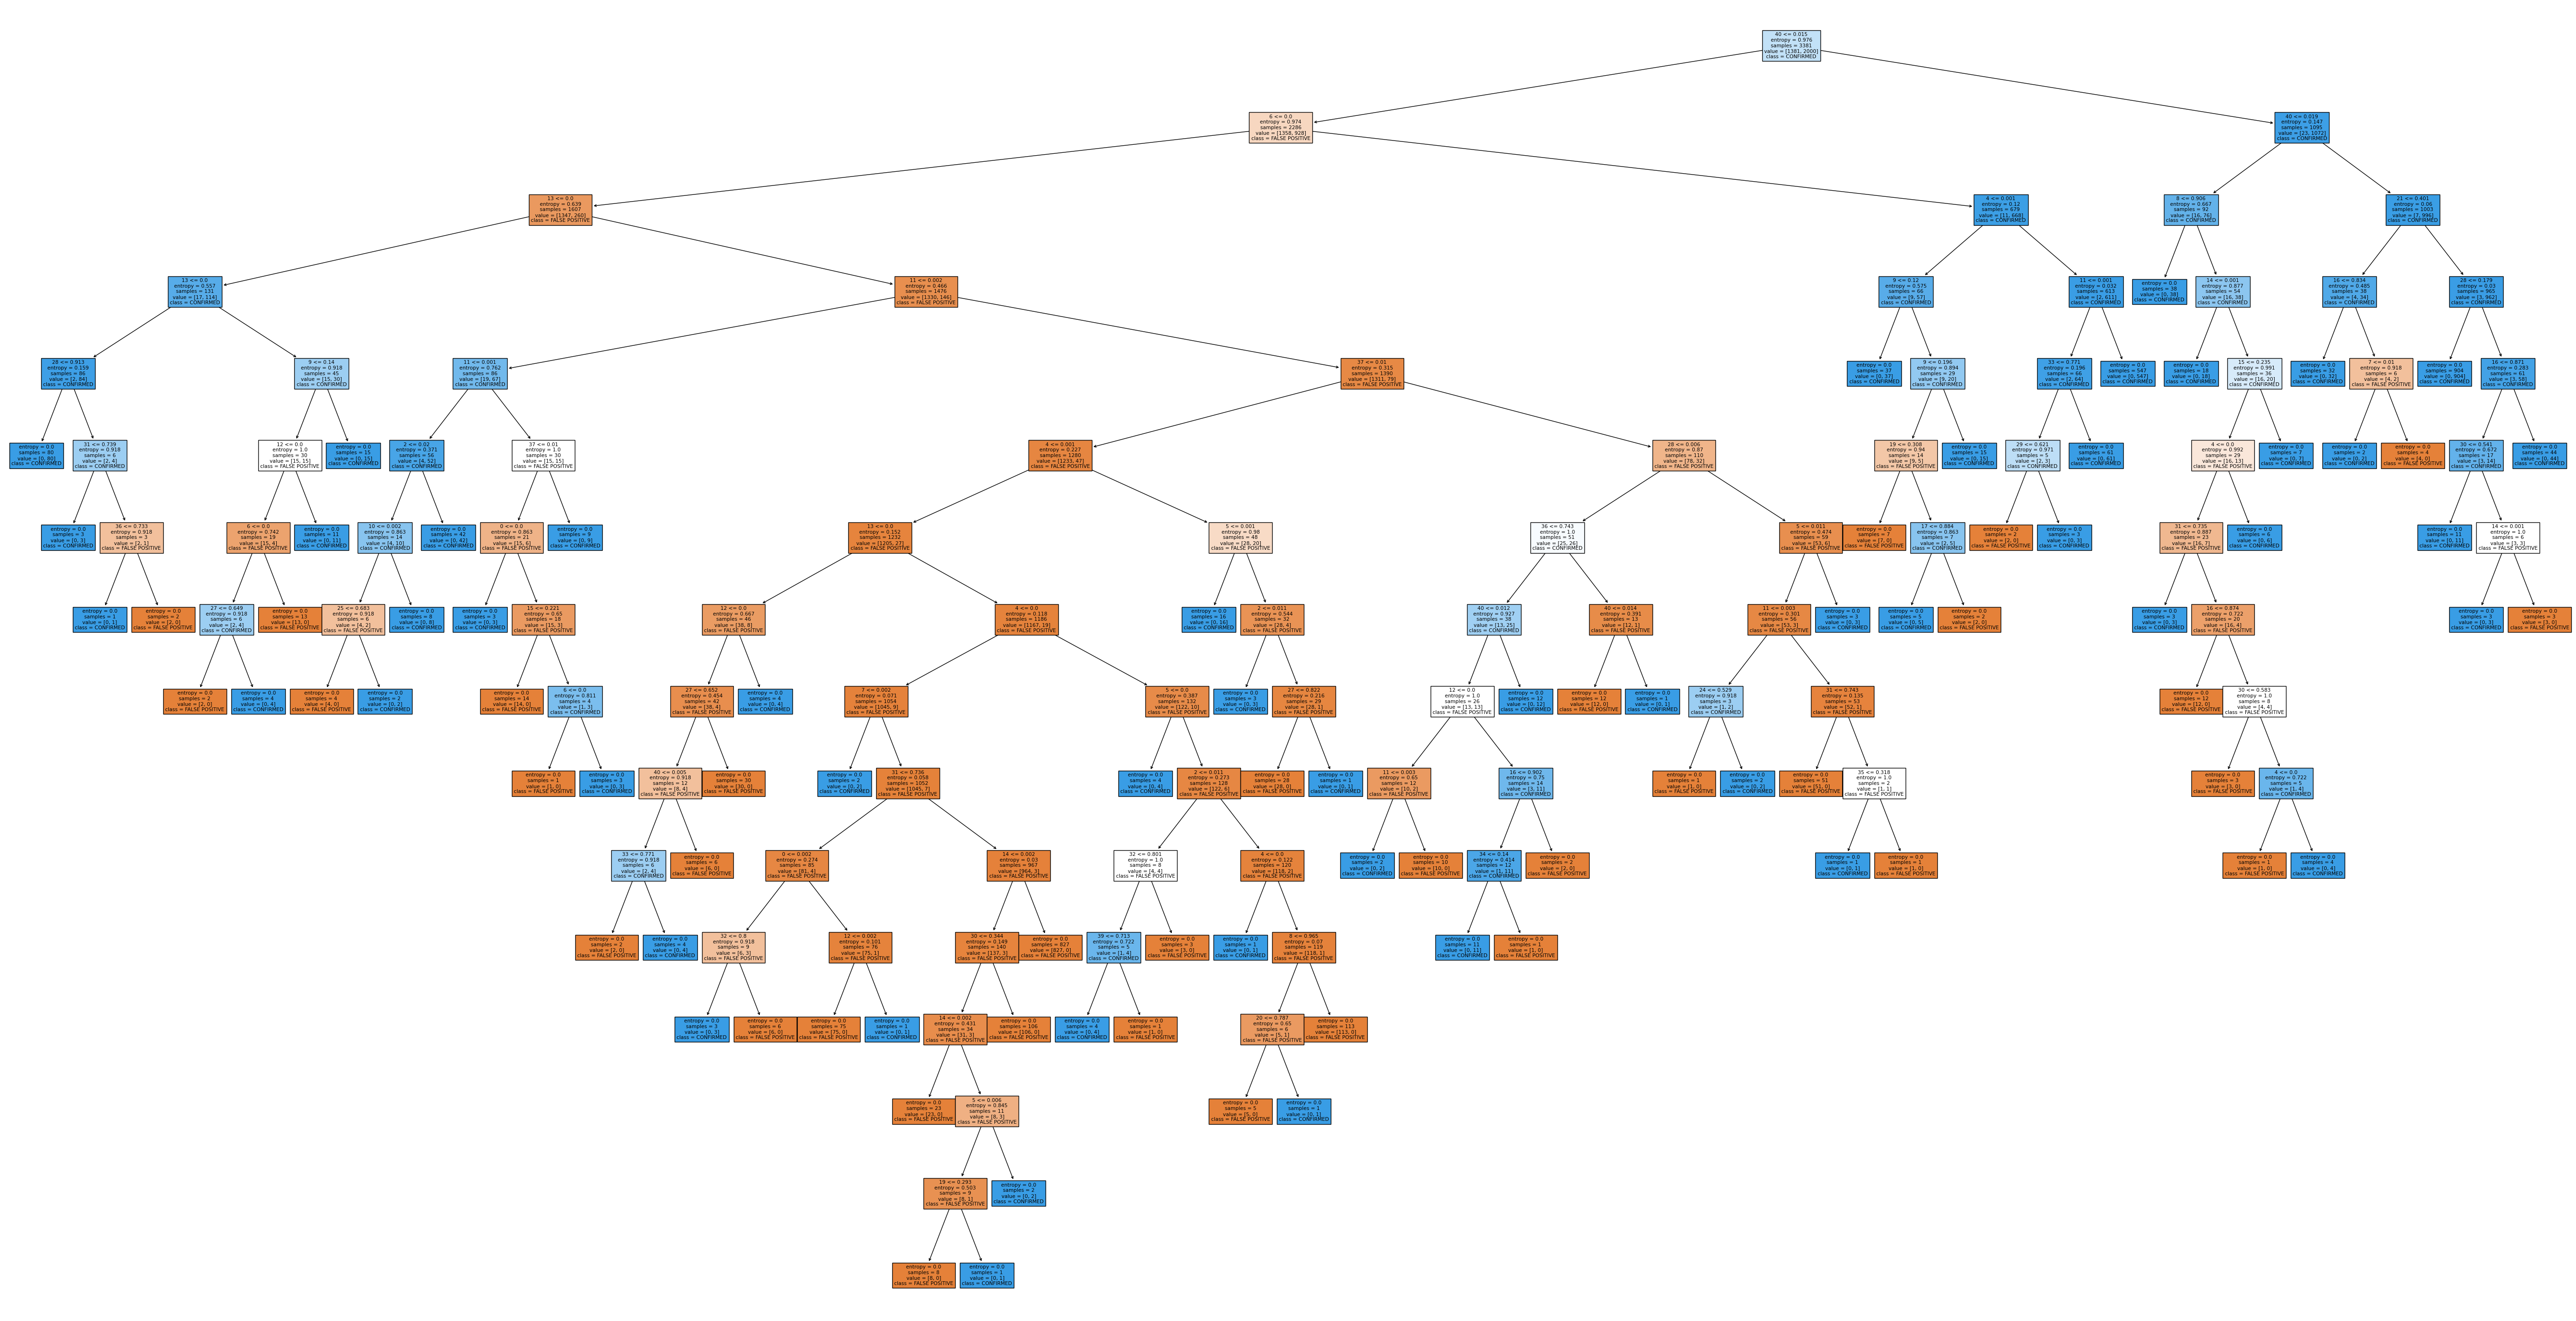

In [27]:
fig = plt.figure(figsize=(70,36))
_ = tree.plot_tree(tree_clf,
                   feature_names=x_train.columns,
                   class_names=y_train.unique(),
                   filled=True)

### Varying heights

Varying the height of the tree increases/decreases the complexity of the model, allowing the model to specialize in a task. However, it is necessary to assess whether it is not causing overfitting.

### Cross Validation

In [28]:
# Variando alturas de 1 a 20
height = range(1,20)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = cross_val_varying_height(x_train, y_train, height)

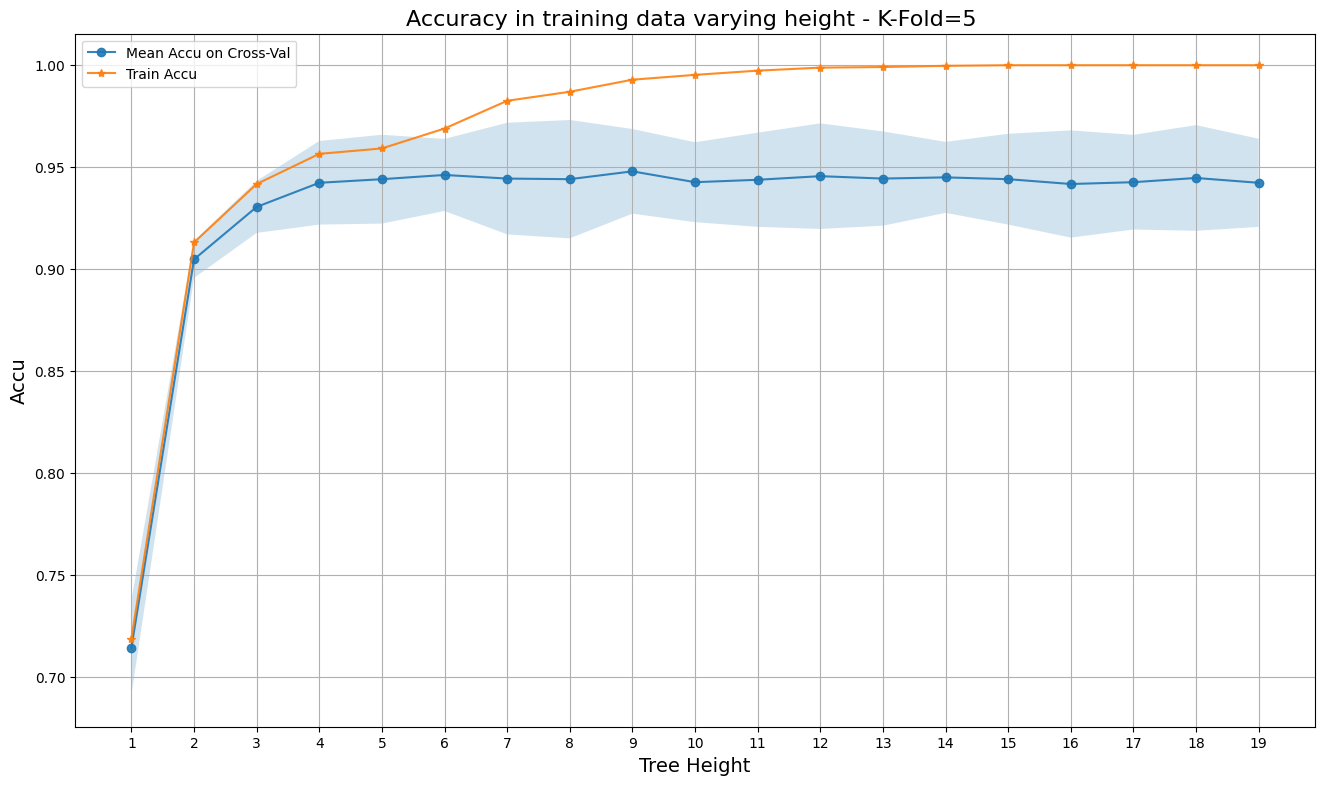

In [29]:
# plotting accuracy
plot_cross_validation_on_trees(height, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores,
                               'Accuracy in training data varying height - K-Fold=5 ')

In [30]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = height[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The Tree of height {} achieved the best average accuracy in cross-validation (K-Fold=5): {} +/- {}% on training data'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The Tree of height 9 achieved the best average accuracy in cross-validation (K-Fold=5): 94.79465 +/- 1.03811% on training data


### The Final Tree

Using the height obtained by cross-validation, we will build the tree with height=5, since for a higher height number, the training accuracy takes off beyond two standard deviations of the cross-validation, suggesting overfitting.

In [31]:
height = 5
Dtree_clf = DecisionTreeClassifier(criterion="entropy", random_state=seed, max_depth=height)


cv_dt = cross_val_score(Dtree_clf, x_train, y_train, cv=k_fold, scoring="accuracy").mean()
print("Decision Tree accuracy in cross-validation with height {}: {:.2f} %"
        .format(height, cv_dt*100))

# Ajusta aos dados
Dtree_clf = Dtree_clf.fit(x_train,y_train)


#Prediz os dados de teste
y_pred = Dtree_clf.predict(x_test)
treino_dt = Dtree_clf.score(x_train,y_train)
print("Decision Tree Accuracy on training data with height {}: {:.2f}%"
        .format(height, treino_dt*100))
teste_dt = Dtree_clf.score(x_test,y_test)
print("Decision Tree Accuracy on test data with height {}: {:.2f} %"
        .format(height, teste_dt*100))



Decision Tree accuracy in cross-validation with height 5: 94.59 %
Decision Tree Accuracy on training data with height 5: 95.92%
Decision Tree Accuracy on test data with height 5: 94.45 %


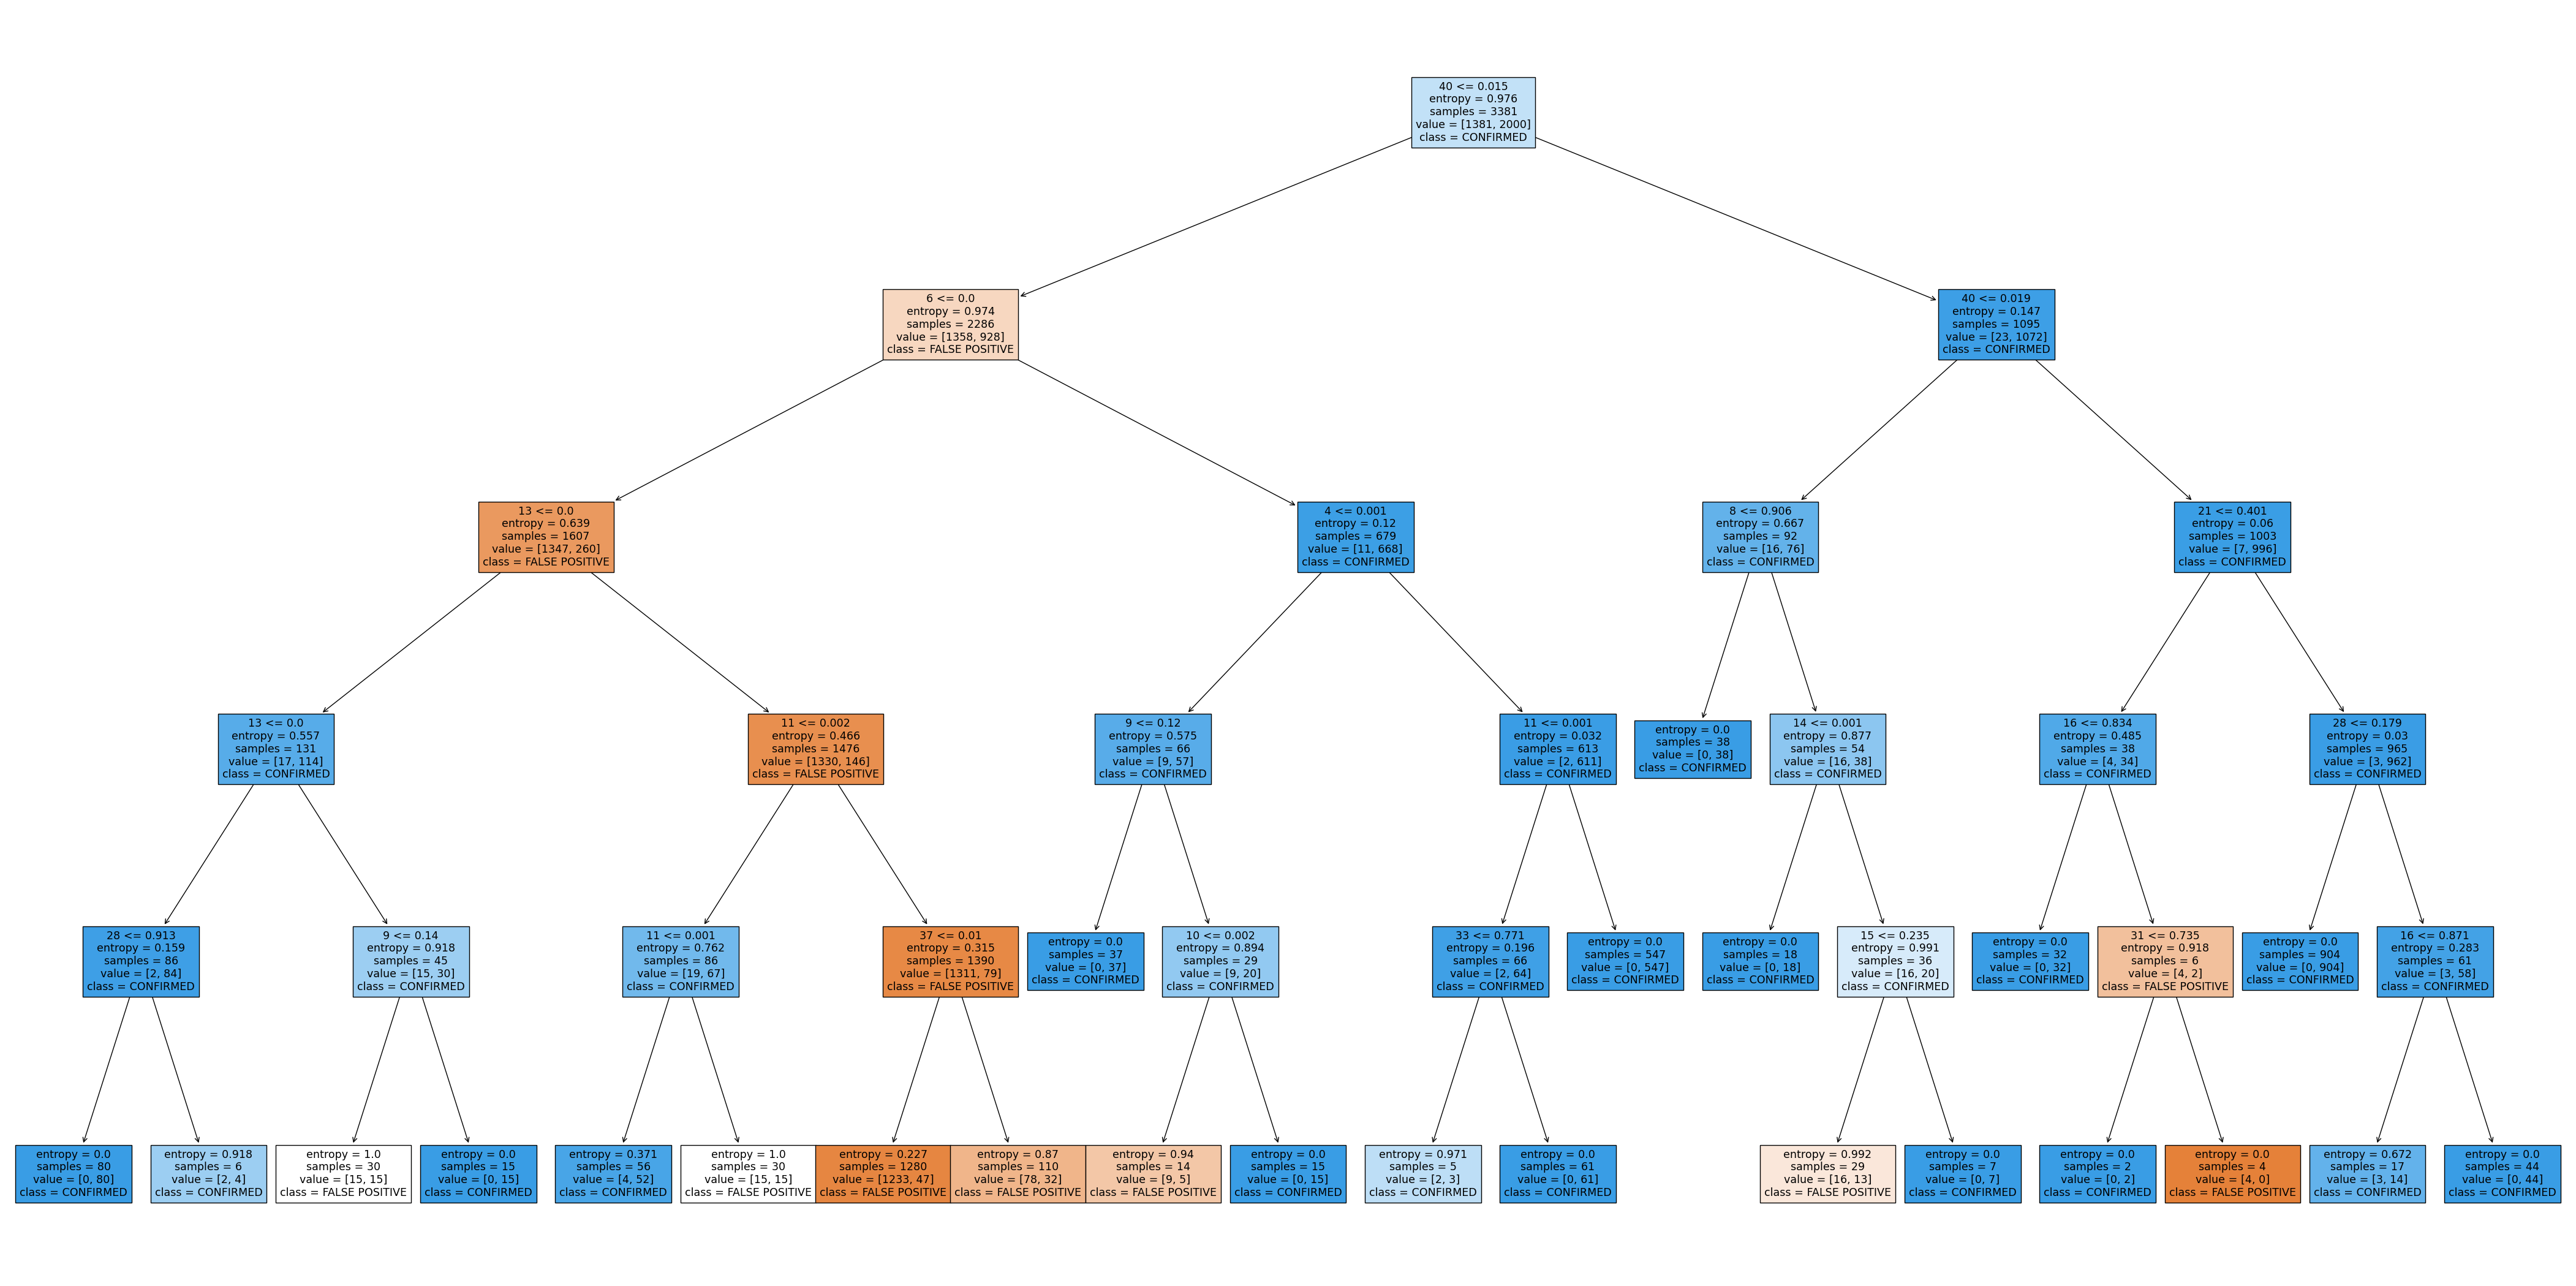

In [32]:
fig = plt.figure(figsize=(54,27))
_ = tree.plot_tree(Dtree_clf,
                   feature_names=x_train.columns,
                   class_names=y_train.unique(),
                   filled=True)

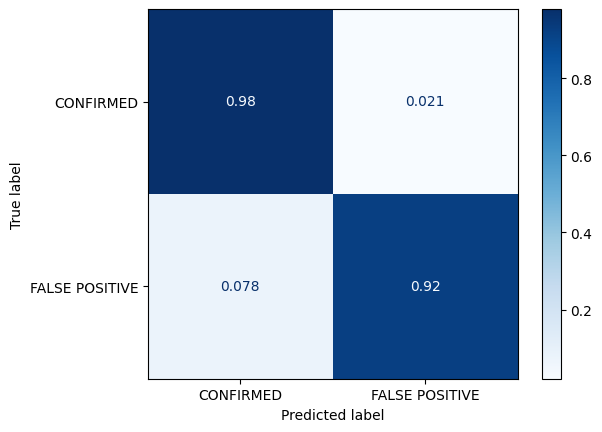

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true',cmap='Blues')
plt.show()

In [34]:
recall_dt = recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision_dt = precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Recall = {:.2f} % | Precision = {:.2f} %".format(recall_nb*100, precision_nb*100))

Recall = 97.23 % | Precision = 83.39 %


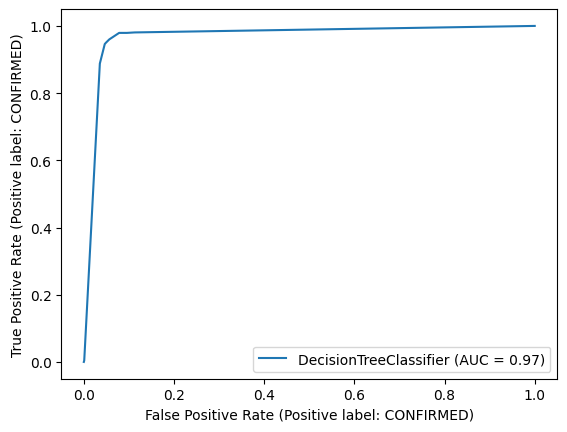

In [35]:
RocCurveDisplay.from_estimator(Dtree_clf,x_test,y_test , pos_label='CONFIRMED')
plt.show()

## Conclusions

* Hyperparameters:
For this problem, the height of the tree can be varied to find an optimal point that does not cause underfitting or overfitting. This parameter was evaluated by observing the variation in the training and test accuracy and the cross-validation with K-Fold=5.

* Height:
Through cross-validation, the tree with a height of 5 was chosen. With a height greater than 5, the training accuracy continues to improve, until at a height of 15, it reaches 100% accuracy. However, the validation and test accuracies do not show this continuous growth, stagnating around 95%. This may indicate overfitting for trees with a height greater than 5.

Decision Tree accuracy in cross-validation with height 5: 94.59 %

Decision Tree accuracy in training data with height 5: 95.92 %

Decision Tree accuracy in test data with height 5: 94.45 %

In addition, a recall = 97.93 %, precision = 89.17 % and Area under the ROC curve of 97% were obtained.
Based on the results of the experiment, the following conclusions can be drawn:

* A decision tree with a height of 5 is a good choice for this problem.
This tree achieves a high accuracy of 94.59 % on the cross-validation set.
* The tree also achieves a good recall of 97.93 %, which indicates that it is good at identifying positive cases.
* The tree achieves a good precision of 89.17 %, which indicates that it is good at avoiding false positives.

Overall, the results of this experiment suggest that a decision tree with a height of 5 is a good choice for this problem. The tree achieves a high accuracy and good recall and precision, which suggests that it is able to accurately classify the data.


# SVM


Support Vector Machines (SVMs) are algorithms that seek to find the optimal hyperplane in an N-dimensional space (N attributes) that separates the data with the largest possible margin. This margin is built based on the points closest to the decision boundary (support vectors), equally distant from the points of each class. The Margin can be sought by admitting different error levels, with the margin size and the admitted error being parameters that are calibrated by a hyperparameter.

The optimal margin hyperplane would initially be able to separate only linearly separable data, however, by using the "Kernel Trick", the data are virtually (not explicitly) shifted so that they become linearly separable. The resulting algorithm is formally similar, however using a non-linear kernel function that transforms the data and makes them linearly separable.

Some classically used kernels are: linear, sigmoid, polynomial, and RBF

The loss function that allows maximizing the margin is called Hinge Loss:

$c(x,y,f(x)) = (1 - y * f(x)) $

The cost is zero if the predicted value and the expected value are the same, and only differs from zero if the values are not equal. The regularization parameter is responsible for the trade-off between maximizing the margin and decreasing the error. With the regularization factor, the Loss takes the form:

$ min_{w}λ ||w||^2 + \sum_{i=1}^n(1-y_{i}<x_{i},w>)    $

Parameter updates are given by gradients, given by the partial derivative of the loss with respect to the weights. When the predicted class differs from the expected one, the weight update is given by:

$w = w + α(y_{i} x_{i} - 2 λ w)  $

When the predicted class is the same as the expected one, the weight update is summarized to:

$w = w - α(2 λ w)  $

## Implementation

In [36]:
from sklearn.svm import SVC

By default, the sklearn svm.SVC uses the regularization parameter = 1. We can vary this value to obtain stricter margins (fewer errors) or allow a "soft" margin that allows more errors and expands its size.

The default kernel is rbf. Let's initially test a linear kernel.

The max_iter parameter limits the number of iterations. It may be necessary since the runtime increases quadratically with the number of samples and can be impractical with a few thousand examples.

In [37]:
svc_clf = SVC(C=1,kernel='linear',max_iter=10000,random_state=seed)
svc_clf.fit(x_train,y_train)
y_pred = svc_clf.predict(x_test)

print("Accuracy using linear kernel = {:.3f}".format(accuracy_score(y_test,y_pred)))

Accuracy using linear kernel = 0.898


In [38]:
svc_clf = SVC(C=1,kernel='sigmoid',max_iter=10000,random_state=seed)
svc_clf.fit(x_train,y_train)
y_pred = svc_clf.predict(x_test)

print("Accuracy using Sigmoid kernel = {:.3f}".format(accuracy_score(y_test,y_pred)))

Accuracy using Sigmoid kernel = 0.533


In [39]:
svc_clf = SVC(C=1,kernel='poly',max_iter=10000,random_state=seed)
svc_clf.fit(x_train,y_train)
y_pred = svc_clf.predict(x_test)

print("Accuracy using Polynomial kernel = {:.3f}".format(accuracy_score(y_test,y_pred)))

Accuracy using Polynomial kernel = 0.916


In [40]:
svc_clf = SVC(C=1,kernel='rbf',max_iter=10000,random_state=seed)
svc_clf.fit(x_train,y_train)
y_pred = svc_clf.predict(x_test)

print("Accuracy using RBF kernel = {:.3f}".format(accuracy_score(y_test,y_pred)))

Accuracy using RBF kernel = 0.889


In [41]:
def svc_single(regularizadores,kernel,max_iter,X,Y):
  #vamos separar 35/65 os dados de treino e teste
  x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                        test_size=0.35, random_state=seed)
  accu_treino = []
  accu_test = []
  for C in regularizadores:
    svc_clf = SVC(C=C,kernel=kernel ,max_iter=max_iter,random_state=seed)
    svc_clf.fit(x_train,y_train)
    accu_treino.append(svc_clf.score(x_train,y_train))
    accu_test.append(svc_clf.score(x_test,y_test))
    #print("kernel{},C={},accuTreino={:.2f},AccuTest={:.2f}".format(kernel,C,svc_clf.score(x_train,y_train),svc_clf.score(x_test,y_test)))

  accu_treino = np.array(accu_treino)
  accu_test = np.array(accu_test)
  idx_max = accu_treino.argmax()
  best_treino = accu_treino[idx_max]
  best_test = accu_test[idx_max]
  best_C = regularizadores[idx_max]
  print("kernel{},C={},accuTreino={:.2f},AccuTest={:.2f}".format(kernel,best_C,best_treino,best_test))
  return best_treino, best_test, best_C, accu_treino, accu_test

In [42]:
def validacao_cruzada_variando_C(x_train, y_train, regularizadores,kernel,max_iter, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for C in regularizadores:
        svm_c_model = SVC(C=C,kernel=kernel ,max_iter=max_iter,random_state=seed)
        cv_scores = cross_val_score(svm_c_model, x_train, y_train, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(svm_c_model.fit(x_train, y_train).score(x_train, y_train))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    idx_max = cv_scores_mean.argmax()
    best_CV = cv_scores_mean[idx_max]
    best_accu = accuracy_scores[idx_max]
    best_C = regularizadores[idx_max]
    print("Melhor CV = {:.3f} com acuracia de treino = {:.3f} com C={:.3f}".format(best_CV, best_accu,best_C))
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [43]:
# function for plotting cross-validation results
def plot_cross_validation_on_svmc(C, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(16,9))
    ax.plot(C, cv_scores_mean*100, '-o', label='Acurácia média da Validação Cruzada', alpha=0.9)
    ax.fill_between(C, (cv_scores_mean-2*cv_scores_std)*100, (cv_scores_mean+2*cv_scores_std)*100, alpha=0.2) #2 desvios padrões
    ylim = plt.ylim()
    ax.plot(C, accuracy_scores*100, '-*', label='Acurácia de Treino', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Regularizador", fontsize=14)
    #ax.set_xlim(-100,1100)
    ax.set_ylabel('Acurácia %', fontsize=14)
    #ax.set_ylim(ylim)
    ax.set_xticks(C)
    ax.grid()
    ax.legend()

In [44]:
# function for plotting cross-validation results
def plot_log_cross_validation_on_svmc(C, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(16,9))
    ax.plot(np.log(C), cv_scores_mean*100, '-o', label='Acurácia média da Validação Cruzada', alpha=0.9)
    ax.fill_between(np.log(C), (cv_scores_mean-2*cv_scores_std)*100, (cv_scores_mean+2*cv_scores_std)*100, alpha=0.2) #2 desvios padrões
    ylim = plt.ylim()
    ax.plot(np.log(C), accuracy_scores*100, '-*', label='Acurácia de Treino', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Log do Regularizador", fontsize=14)
    #ax.set_xlim(-100,1100)
    ax.set_ylabel('Acurácia %', fontsize=14)
    #ax.set_ylim(ylim)
    ax.set_xticks(np.log(C))
    ax.grid()
    ax.legend()

## Regularization

In [45]:
regularizators = [0.1,1,5,10,20,50,80,100,200,400,800,1000]

## Kernel Linear

In [46]:
acuracia_treino, acuracia_teste, c,accu_treino, accu_test = svc_single(regularizators,"linear",100000,X_minmax,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


kernellinear,C=1000,accuTreino=0.96,AccuTest=0.95


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [47]:
acuracia_treino, acuracia_teste, c

(0.9562259686483289, 0.9489291598023064, 1000)

### Cross Validation

In [48]:
svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores = validacao_cruzada_variando_C(x_train, y_train, regularizators,'linear',100000, cv=5, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).

Melhor CV = 0.949 com acuracia de treino = 0.956 com C=1000.000


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


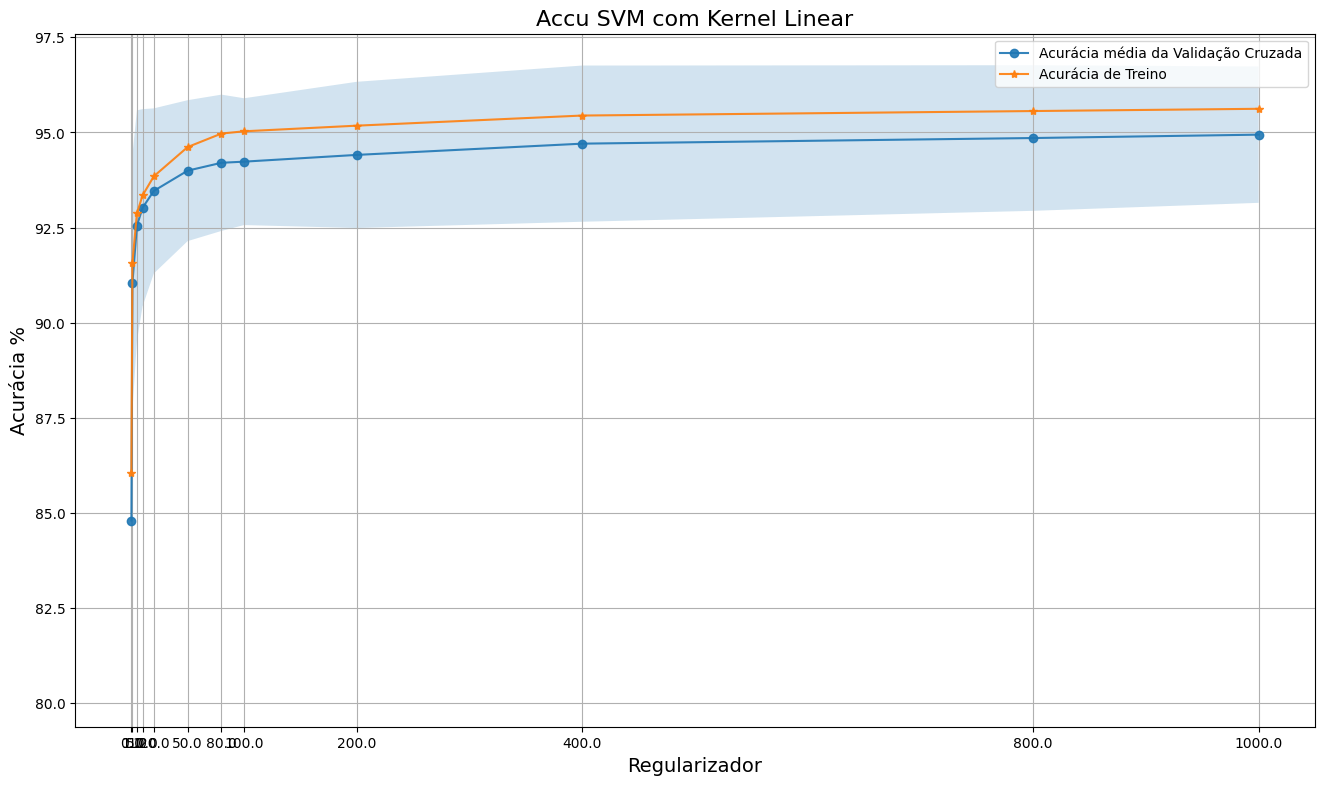

In [49]:
plot_cross_validation_on_svmc(regularizators, svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores, 'Accu SVM com Kernel Linear')

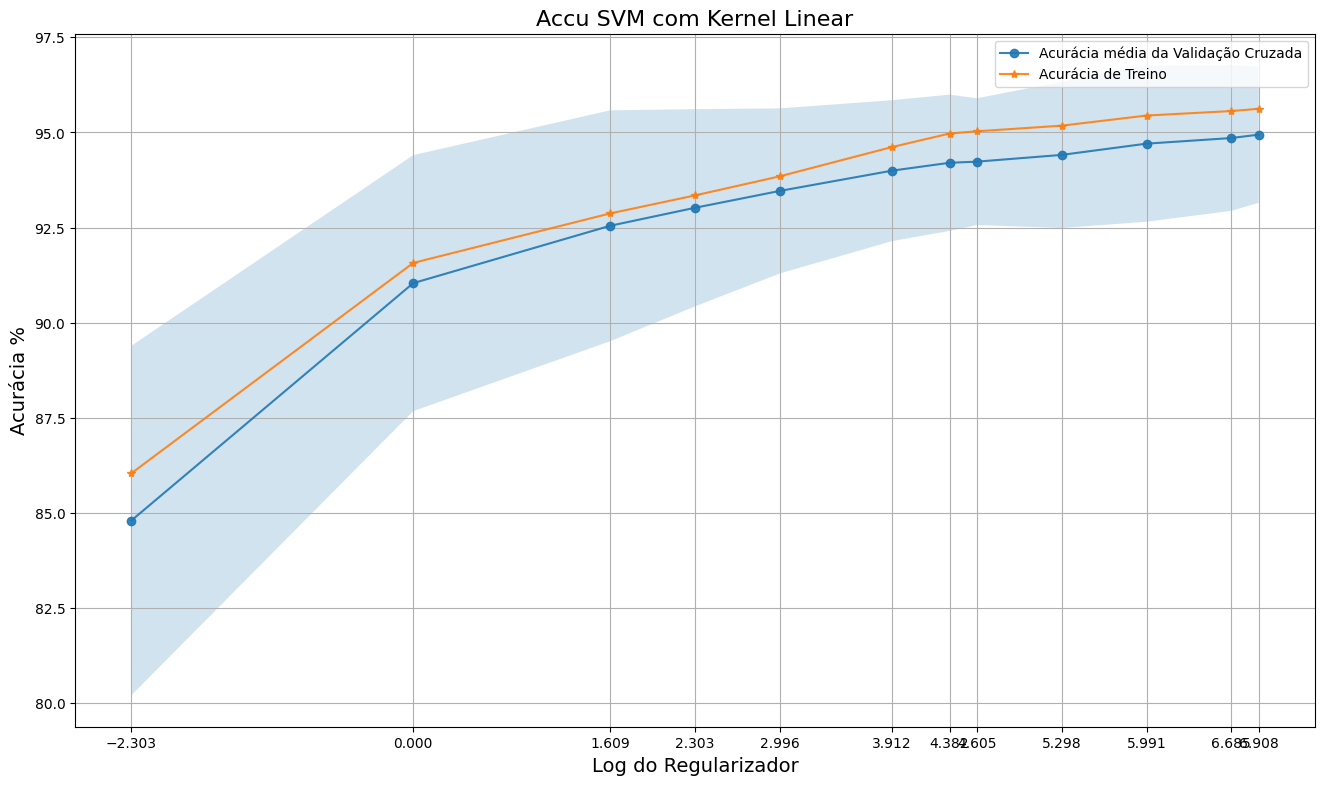

In [50]:
plot_log_cross_validation_on_svmc(regularizators, svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores, 'Accu SVM com Kernel Linear')

### Precision e Recall



In [51]:
# cria o modelo
svmc_classifier_lin = SVC(C=1000, kernel="linear" , max_iter=100000, random_state=seed)

cv_svmc_lin = cross_val_score(svmc_classifier_lin, x_train, y_train, cv=k_fold, scoring="accuracy").mean()
print("SVC Linear Accuracy on k-fold: {:.2f} %"
        .format(cv_svmc_lin*100))

# Ajusta aos dados
svmc_classifier_lin = svmc_classifier_lin.fit(x_train,y_train)

#Prediz os dados de teste
y_pred = svmc_classifier_lin.predict(x_test)

treino_svmc_lin = svmc_classifier_lin.score(x_train,y_train)
print("Accuracy of Linear SVC on train data: {:.2f} %"
        .format(treino_svmc_lin*100))

teste_svmc_lin = svmc_classifier_lin.score(x_test,y_test)
print("Accuracy of Linear SVC on test data: {:.2f} %"
        .format(teste_svmc_lin*100))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).

SVC Linear Accuracy on k-fold: 94.94 %
Accuracy of Linear SVC on train data: 95.62 %
Accuracy of Linear SVC on test data: 94.89 %


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Considering the SVC with C=1000 and limited to 100k iterations, the confusion matrix and ROC curve below were constructed, in addition to the Precision and Revocation metrics.

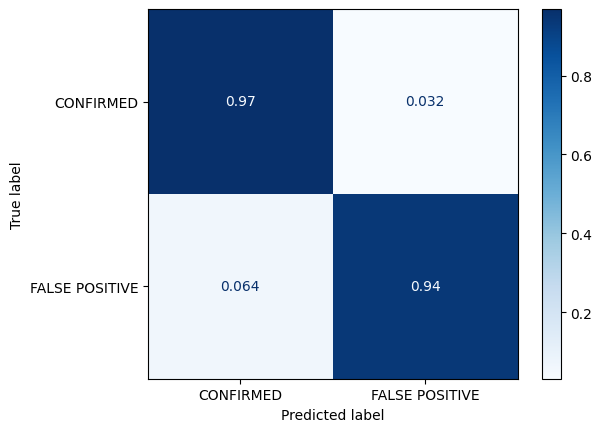

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true',cmap='Blues')
plt.show()

Recall = 97.23 % | Precision = 83.39 %


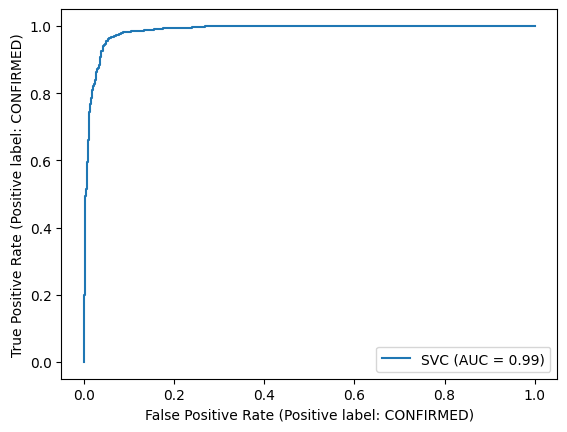

In [53]:
recall_svmc_lin = recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision_svmc_lin = precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Recall = {:.2f} % | Precision = {:.2f} %".format(recall_nb*100, precision_nb*100))

RocCurveDisplay.from_estimator(svmc_classifier_lin,x_test,y_test , pos_label='CONFIRMED')
plt.show()

## Kernel Polinomial

In [54]:
acuracia_treino, acuracia_teste, c,accu_treino, accu_test = svc_single(regularizators,"poly",100000,X_minmax,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


kernelpoly,C=1000,accuTreino=0.97,AccuTest=0.95


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [55]:
acuracia_treino, acuracia_teste, c

(0.9724933451641526, 0.9483800109829764, 1000)

### Cross Validation

In [56]:
svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores = validacao_cruzada_variando_C(x_train, y_train, regularizators,'poly',100000, cv=5, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).

Melhor CV = 0.951 com acuracia de treino = 0.966 com C=400.000


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Melhor CV = 0.951 com acuracia de treino = 0.966 com C=400.000

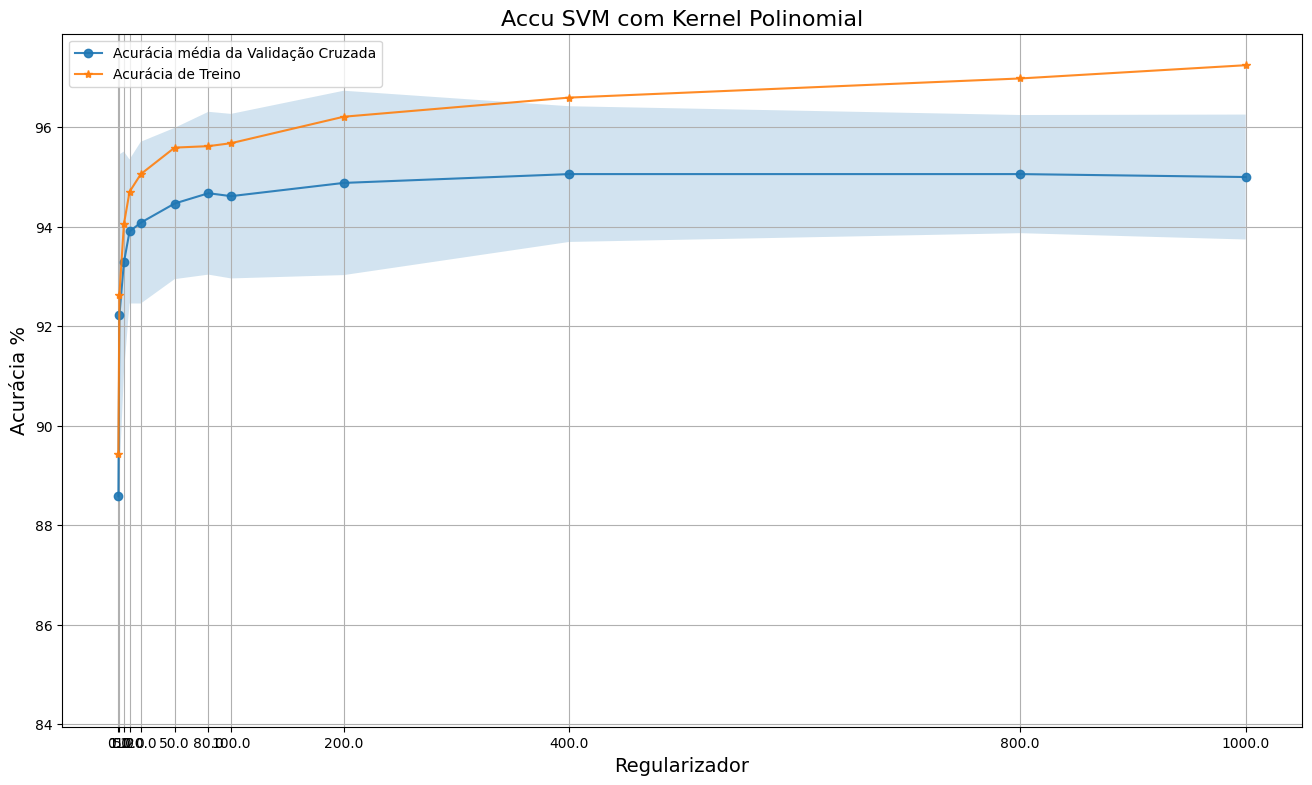

In [57]:
plot_cross_validation_on_svmc(regularizators, svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores, 'Accu SVM com Kernel Polinomial')

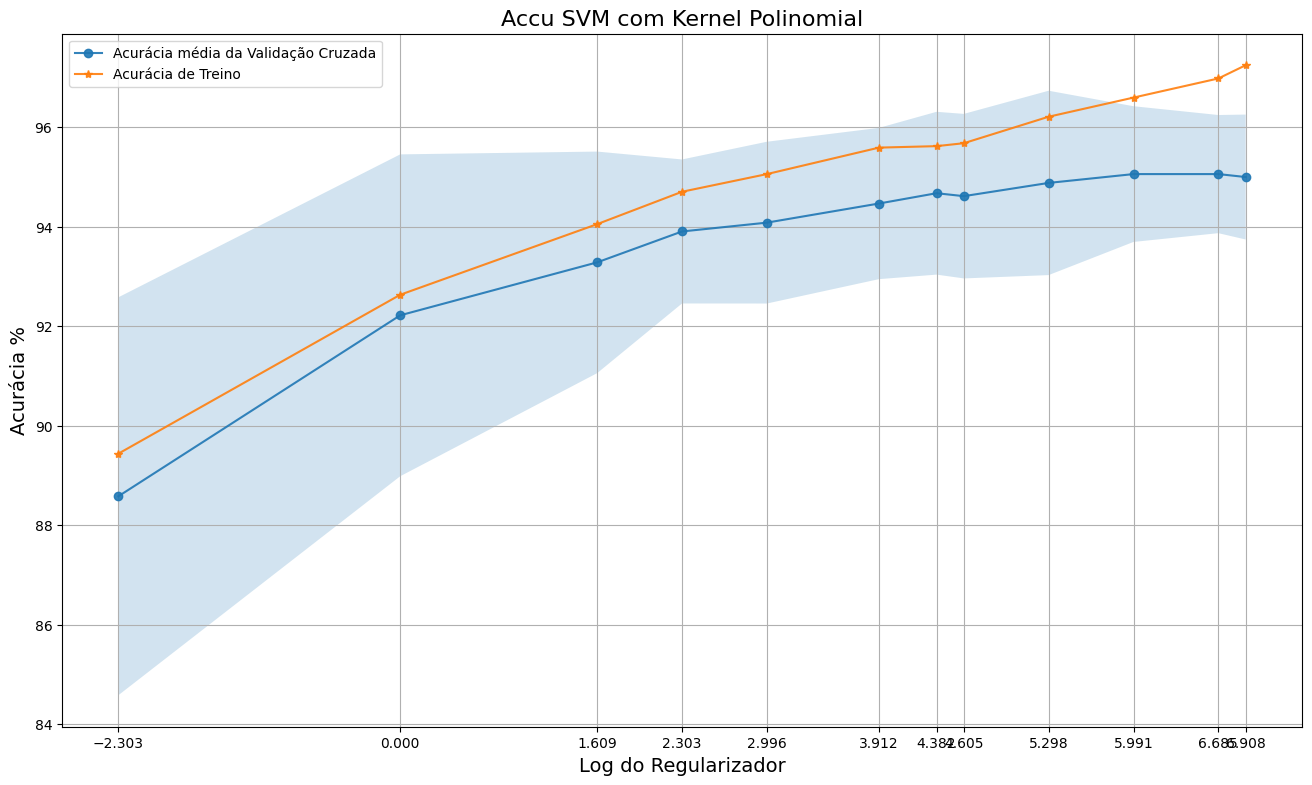

In [58]:
plot_log_cross_validation_on_svmc(regularizators, svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores, 'Accu SVM com Kernel Polinomial')

### Precision e Recall




In [59]:
# cria o modelo
svmc_classifier = SVC(C=200, kernel="poly" , max_iter=100000, random_state=seed)

# Ajusta aos dados
svmc_classifier = svmc_classifier.fit(x_train,y_train)

#Prediz os dados de teste
y_pred = svmc_classifier.predict(x_test)

print("SVC Polynomial accuracy on train data: {:.2f} %"
        .format(svmc_classifier.score(x_train,y_train)*100))

print("SVC Polynomial accuracy on test data: {:.2f} %"
        .format(svmc_classifier.score(x_test,y_test)*100))

SVC Polynomial accuracy on train data: 96.21 %
SVC Polynomial accuracy on test data: 94.62 %


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


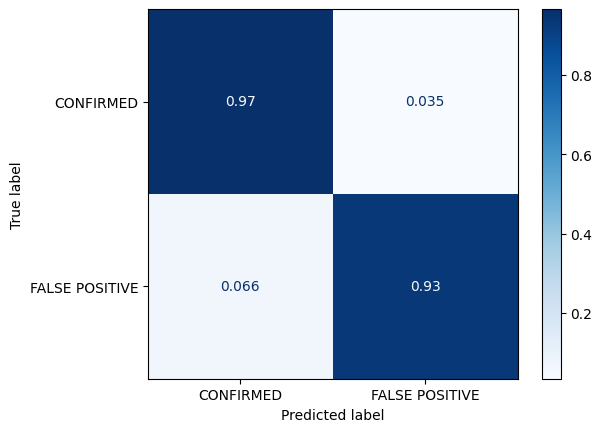

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true',cmap='Blues')
plt.show()

Recall = 96.54 % | Precision = 90.53 %


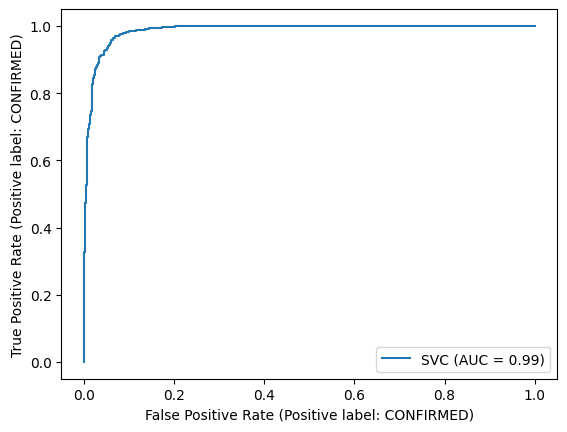

In [61]:
recall_nb = recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision_nb = precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Recall = {:.2f} % | Precision = {:.2f} %".format(recall_nb*100, precision_nb*100))

RocCurveDisplay.from_estimator(svmc_classifier,x_test,y_test , pos_label='CONFIRMED')
plt.show()

## Kernel RBF

In [62]:
acuracia_treino, acuracia_teste, c,accu_treino, accu_test = svc_single(regularizators,"rbf",100000,X_minmax,Y)

kernelrbf,C=1000,accuTreino=0.97,AccuTest=0.94


In [63]:
acuracia_treino, acuracia_teste, c

(0.9650990831115055, 0.9445359692476661, 1000)

### Cross Validation

In [64]:
svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores = validacao_cruzada_variando_C(x_train, y_train, regularizators,'rbf',100000, cv=5, scoring='accuracy')

Melhor CV = 0.946 com acuracia de treino = 0.965 com C=1000.000


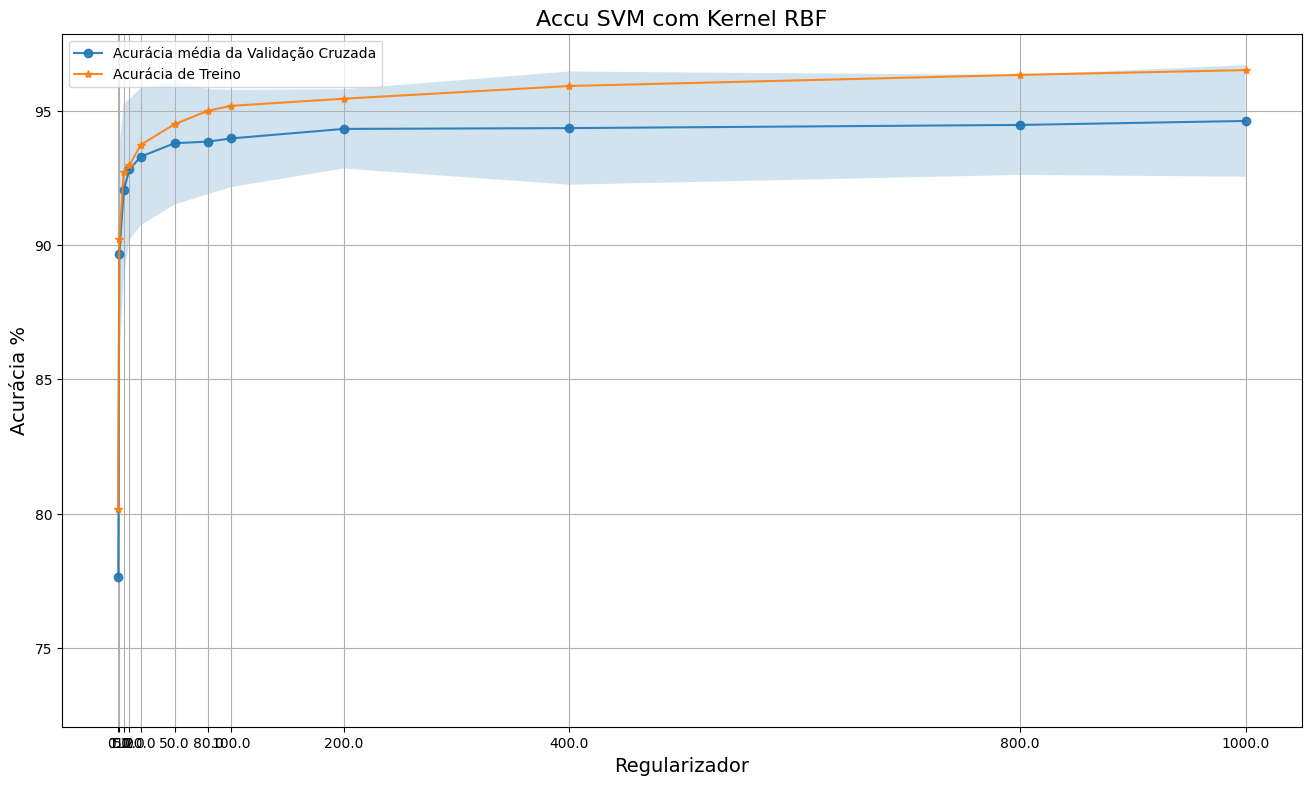

In [65]:
plot_cross_validation_on_svmc(regularizators, svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores, 'Accu SVM com Kernel RBF')

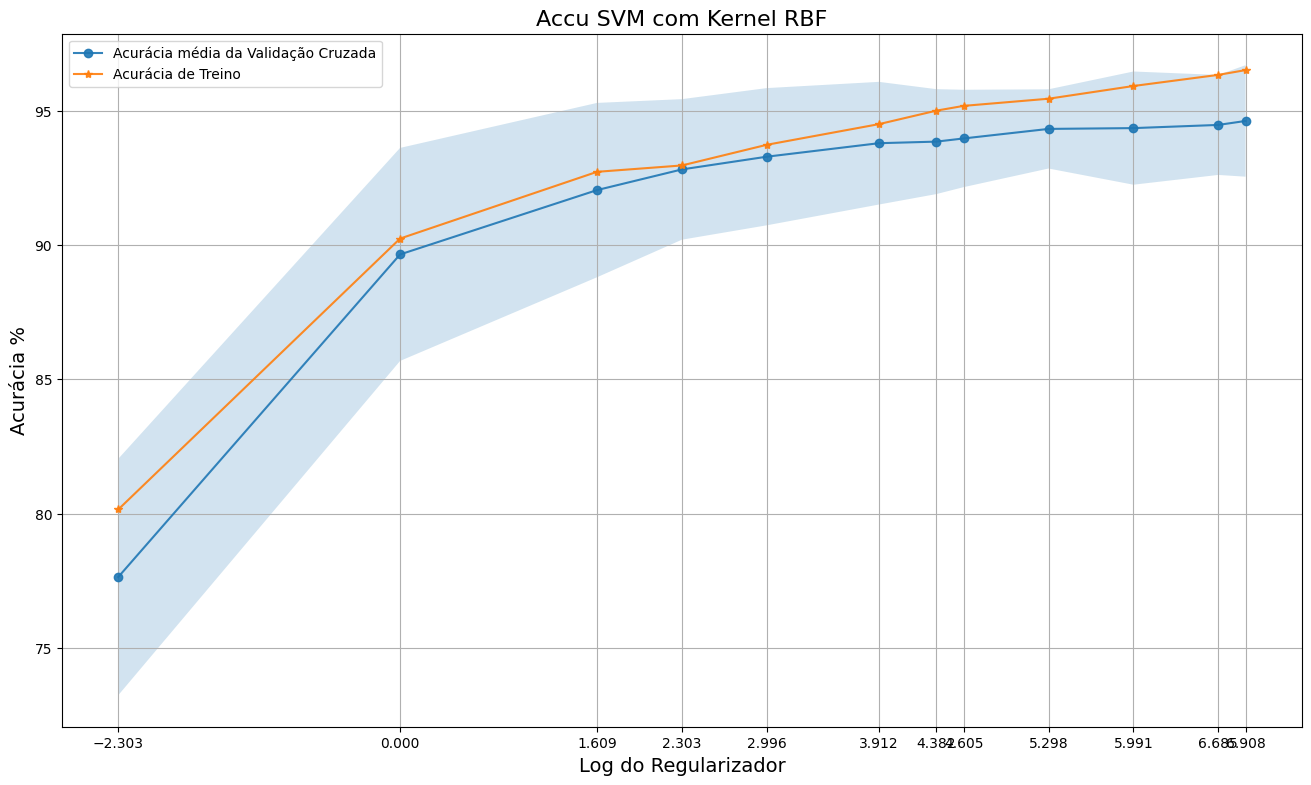

In [66]:
plot_log_cross_validation_on_svmc(regularizators, svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores, 'Accu SVM com Kernel RBF')

### Precision e Recall




In [67]:
# cria o modelo
svmc_classifier = SVC(C=200, kernel="rbf" , max_iter=100000, random_state=seed)

# Ajusta aos dados
svmc_classifier = svmc_classifier.fit(x_train,y_train)

#Prediz os dados de teste
y_pred = svmc_classifier.predict(x_test)

print("SVC RBF accuracy on train data: {:.2f} %"
        .format(svmc_classifier.score(x_train,y_train)*100))

print("SVC RBF accuracy on train data: {:.2f} %"
        .format(svmc_classifier.score(x_test,y_test)*100))

SVC RBF accuracy on train data: 95.45 %
SVC RBF accuracy on train data: 93.85 %


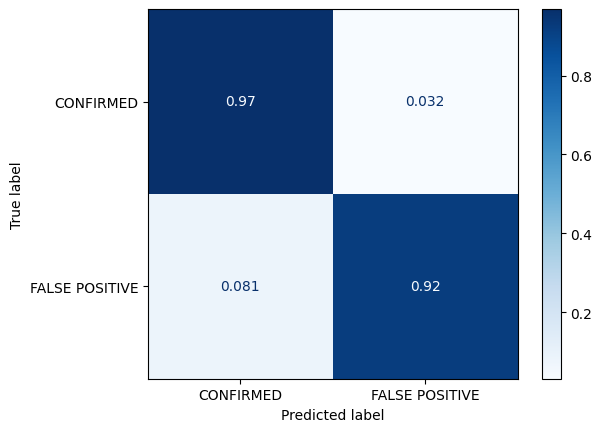

In [68]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true',cmap='Blues')
plt.show()

Recall = 96.82 % | Precision = 88.72 %


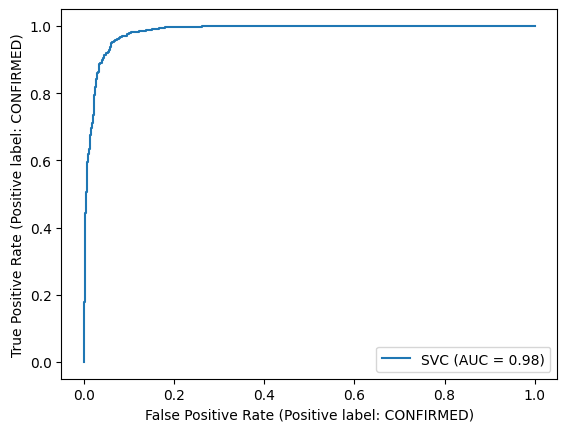

In [69]:

recall_nb = recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision_nb = precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Recall = {:.2f} % | Precision = {:.2f} %".format(recall_nb*100, precision_nb*100))

RocCurveDisplay.from_estimator(svmc_classifier,x_test,y_test , pos_label='CONFIRMED')
plt.show()


## Kernel Sigmoid

In [70]:
acuracia_treino, acuracia_teste, c,accu_treino, accu_test = svc_single(regularizators,"sigmoid",100000,X_minmax,Y)

kernelsigmoid,C=0.1,accuTreino=0.59,AccuTest=0.60


In [71]:
acuracia_treino, acuracia_teste, c

(0.5921325051759835, 0.6035145524437122, 0.1)

### Cross Validation

In [72]:
svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores = validacao_cruzada_variando_C(x_train, y_train, regularizators,'sigmoid',100000, cv=5, scoring='accuracy')

Melhor CV = 0.592 com acuracia de treino = 0.592 com C=0.100


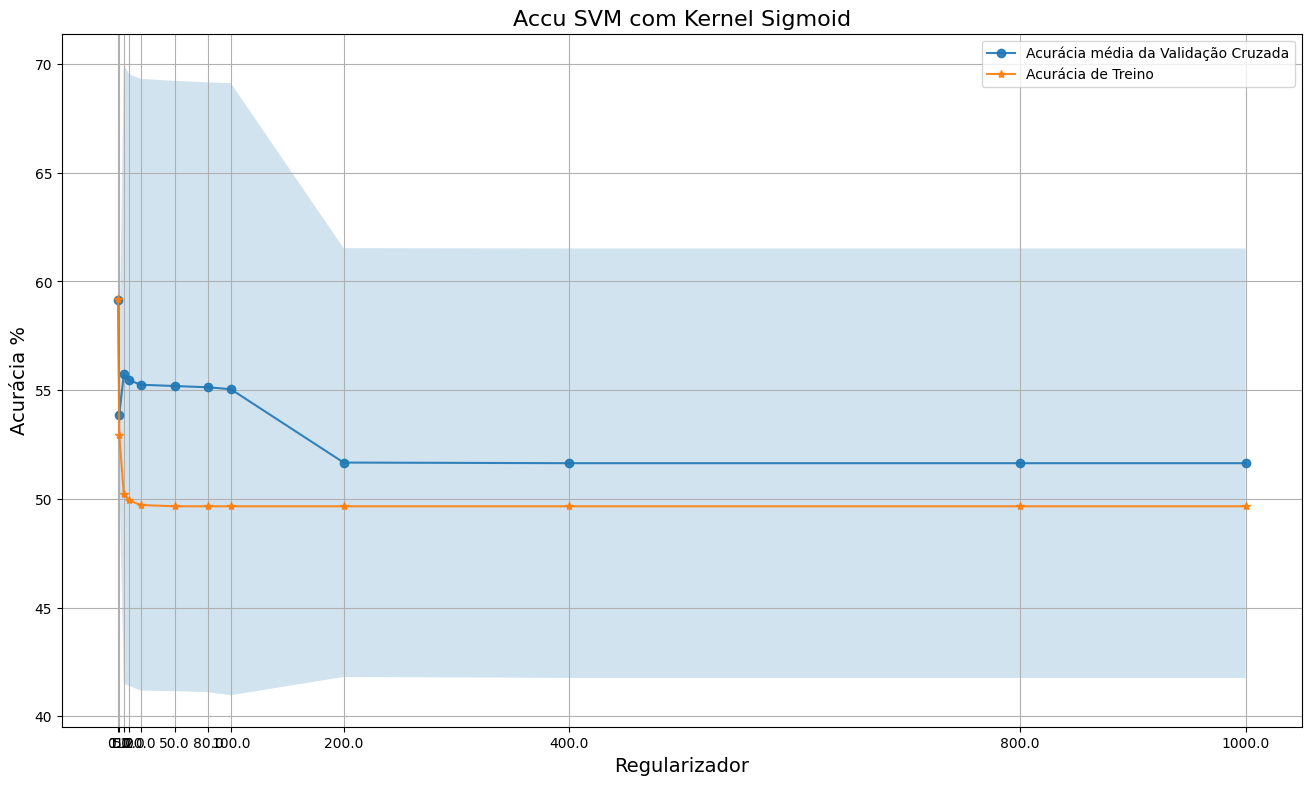

In [73]:
plot_cross_validation_on_svmc(regularizators, svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores, 'Accu SVM com Kernel Sigmoid')

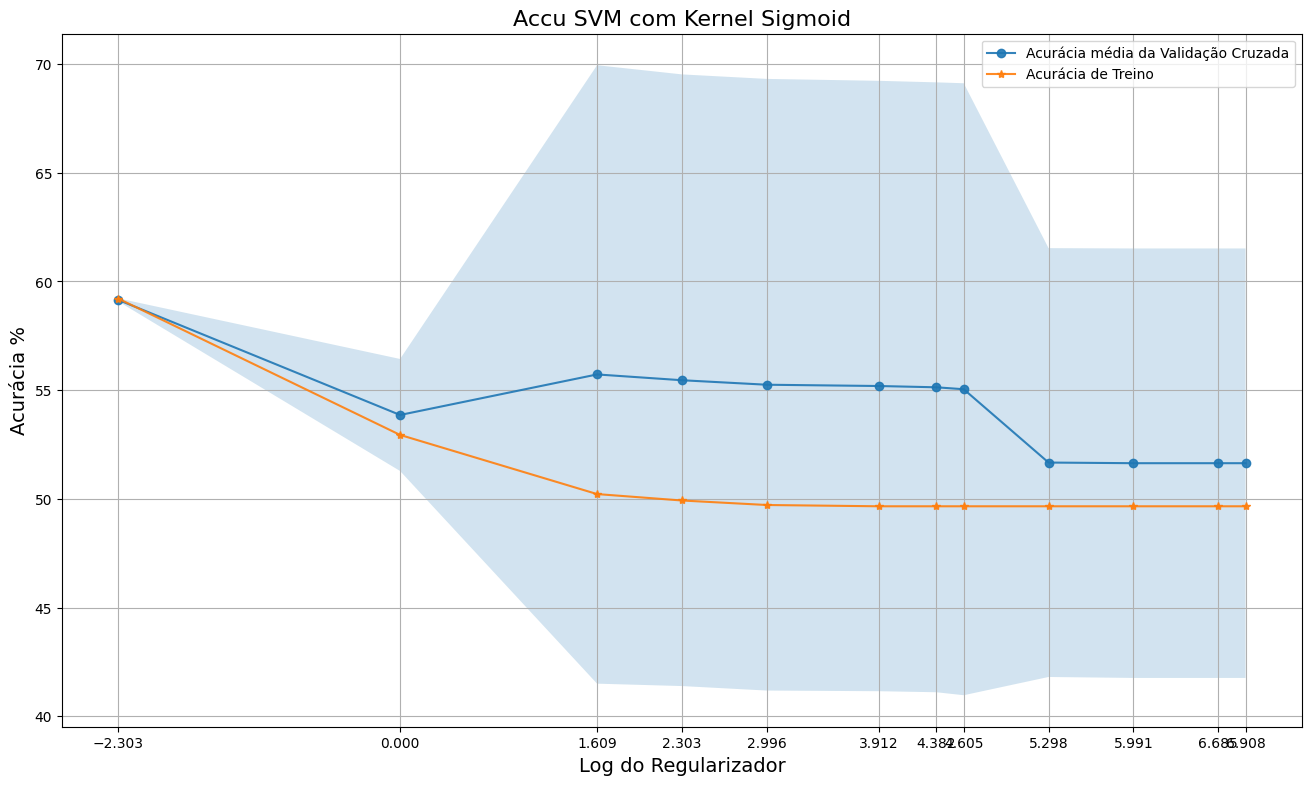

In [74]:
plot_log_cross_validation_on_svmc(regularizators, svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores, 'Accu SVM com Kernel Sigmoid')

### Precision e Recall




In [75]:
# cria o modelo
svmc_classifier = SVC(C=0.1, kernel="sigmoid" , max_iter=100000, random_state=seed)

# Ajusta aos dados
svmc_classifier = svmc_classifier.fit(x_train,y_train)

#Prediz os dados de teste
y_pred = svmc_classifier.predict(x_test)

print("SVC Sigmoid Accuracy on train data : {:.2f} %"
        .format(svmc_classifier.score(x_train,y_train)*100))

print("SVC Sigmoid Accuracy on test data : {:.2f} %"
        .format(svmc_classifier.score(x_test,y_test)*100))

SVC Sigmoid Accuracy on train data : 59.21 %
SVC Sigmoid Accuracy on test data : 60.35 %


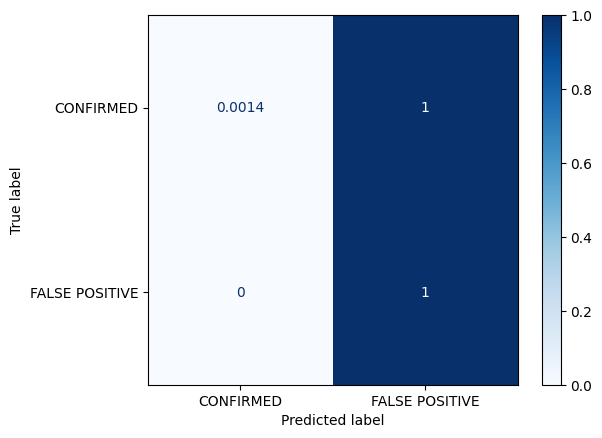

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true',cmap='Blues')
plt.show()

Recall = 0.14 % | Precision = 100.00 %


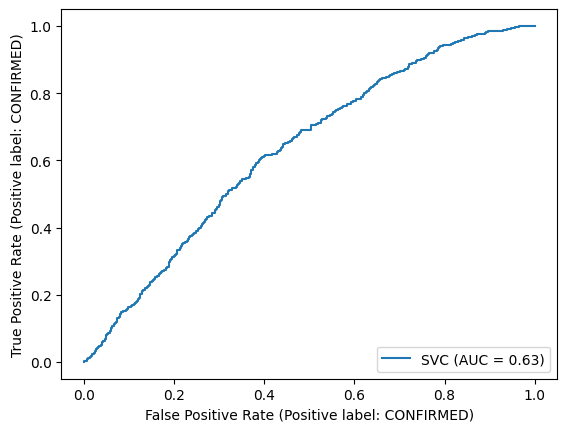

In [77]:

recall_nb = recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision_nb = precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Recall = {:.2f} % | Precision = {:.2f} %".format(recall_nb*100, precision_nb*100))

RocCurveDisplay.from_estimator(svmc_classifier,x_test,y_test , pos_label='CONFIRMED')
plt.show()


## Conclusion


* Linear


Best CV = 0.949 with training accuracy = 0.956

Linear SVC accuracy on training data: 95.62%

Linear SVC accuracy on test data: 94.89%

A recall of 96.82% and a precision of 90.91% were obtained.

Area under the ROC curve: 98.58%

* Polynomial

Best CV = 0.951 with training accuracy = 0.966

Polynomial SVC accuracy on training data: 96.21%

Polynomial SVC accuracy on test data: 94.62%

A recall of 96.82% and a precision of 88.72% were obtained.

Area under the ROC curve: 98.32%

* RBF

Best CV = 0.946 with training accuracy = 0.965

RBF SVC accuracy on training data: 95.45%

RBF SVC accuracy on test data: 93.85%

A recall of 96.68% and a precision of 90.08% were obtained.

Area under the ROC curve: 98.56%

* Sigmoid

Best CV = 0.592 with training accuracy = 0.592

Sigmoid SVC accuracy on training data: 59.21%

Sigmoid SVC accuracy on test data: 60.35%

A recall of 0.14% and a precision of 100.00% were obtained.

Area under the ROC curve: 63.17%

Except for the Sigmoid kernel, a higher value of the regularizer C resulted in an increase in the accuracy of the model. This suggests that for these data, the model is more accurate when it seeks a model that minimizes errors at the expense of expanding the margin.

For the Linear, Polynomial, and RBF kernels, it was possible to obtain accuracies around 95% for the training data, cross-validation data, and test data, which suggests that the data are properly adjusted.

This hypothesis is reinforced by the values obtained for precision +- 90% (correct classifications of the model when classifying the data as positive) and recall +- 95% (identifying positive examples), showing that the models are capable of detecting positive cases. The AUC of around 98% also reinforces this hypothesis.

# k-NN

Vary the number of neighbors and showing the results graphically:

k-NN - k-Nearest Neighbors or k-nearest neighbors is an algorithm that does not assume a data distribution a priori, that is, it is a non-parametric algorithm.

In addition, it is a "lazy algorithm" that does not require training to generate the model, and all training data can be used in testing.

In k-NN, K is the number of neighbors. It is the most important hyperparameter. Typically, it is an odd number when used in binary classification.

The algorithm works basically as follows: Given a point for which we want to classify, find the nearest neighbors and classify the point based on the classes of the nearest neighbors.

k-NN performs better with a reduced number of attributes, especially with few labeled data available. By increasing the number of dimensions/attributes, there is a greater risk of overfitting.

There is no general optimal number of neighbors for any data, we will have to experiment. For few neighbors, noise will have a major influence on the result, and is subject to lower bias and higher variance. With many neighbors, the computational cost increases, and implies lower variance error, but with higher bias.

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
def knn_multi_k_cv(n_vizinhos,x_train, x_test, y_train, y_test,cv, scoring='accuracy'):
  plt.figure(dpi=150)
  labels = ["Cross Validation", "Train", "Test"]
  colours = ["g", "b", "k"]

  accu_treino = []
  accu_test = []
  for k_vizinhos in n_vizinhos:
    knn_model = KNeighborsClassifier(n_neighbors= k_vizinhos)
    val_cruzada = cross_val_score(knn_model, x_train, y_train, cv=cv).mean() *100#pega a média dos valores obtidos
    print("KNN Accuracy on K-fold = 5: {:.2f} %".format(val_cruzada))


    knn_model.fit(x_train,y_train)
    treino = knn_model.score(x_train,y_train)*100
    accu_treino.append(treino)
    print("KNN Accuracy with {} neighbors on train data: {:.2f} %".format(k_vizinhos, treino))

    teste = knn_model.score(x_test,y_test)*100
    accu_test.append(teste)
    print("KNN Accuracy with {} neighbors on test data: {:.2f} %".format(k_vizinhos, teste))

    plt.scatter(k_vizinhos, val_cruzada, c=colours[0], alpha=0.5,label=labels[0])
    plt.scatter(k_vizinhos, treino, c=colours[1], alpha=0.5, label=labels[1])
    plt.scatter(k_vizinhos, teste, c=colours[2], alpha=0.5, label=labels[2])

  plt.grid()
  plt.legend(labels, loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
  plt.xticks(n_vizinhos)
  plt.xlabel("N ")
  plt.ylabel("%")
  plt.show()

  accu_treino = np.array(accu_treino)
  accu_test = np.array(accu_test)
  idx_max = accu_test.argmax()
  best_treino = accu_treino[idx_max]
  best_test = accu_test[idx_max]
  best_vizinho = n_vizinhos[idx_max]
  print("With {} neighbors, obtain the best train accuracy ={:.2f}% , and Test Accu ={:.2f} %".format(best_vizinho,best_treino,best_test))
  return best_vizinho, best_treino, best_test, accu_treino, accu_test

In [80]:
def validacao_cruzada_variando_vizinhos(x_train, y_train, n_vizinhos, cv, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for k_vizinhos in n_vizinhos:
        knn_model = KNeighborsClassifier(n_neighbors= k_vizinhos)
        cv_scores = cross_val_score(knn_model, x_train, y_train, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(knn_model.fit(x_train, y_train).score(x_train, y_train))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    idx_max = cv_scores_mean.argmax()
    best_CV = cv_scores_mean[idx_max]
    best_accu = accuracy_scores[idx_max]
    best_vizinho = n_vizinhos[idx_max]
    print("{} vizinhos obtiveram a melhor validação cruzada = {:.3f}% com acuracia de treino = {:.3f}%".format(best_vizinho, best_CV*100, best_accu*100))
    return cv_scores_mean, cv_scores_std, accuracy_scores, best_vizinho

In [81]:
# function for plotting cross-validation results
def plot_cross_validation_on_knn(n_vizinhos, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(16,9))
    ax.plot(n_vizinhos, cv_scores_mean*100, '-o', label='Acurácia média da Validação Cruzada', alpha=0.9)
    ax.fill_between(n_vizinhos, (cv_scores_mean-2*cv_scores_std)*100, (cv_scores_mean+2*cv_scores_std)*100, alpha=0.2) #2 desvios padrões
    ylim = plt.ylim()
    ax.plot(n_vizinhos, accuracy_scores*100, '-*', label='Acurácia de Treino', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("N Vizinhos", fontsize=14)
    #ax.set_xlim(-100,1100)
    ax.set_ylabel('Acurácia %', fontsize=14)
    #ax.set_ylim(ylim)
    ax.set_xticks(n_vizinhos)
    ax.grid()
    ax.legend()

## Implementation

In [82]:
knn_model = KNeighborsClassifier() #default = 5
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)

print("Accu  = {:.3f}%".format(accuracy_score(y_test,y_pred)*100))

Accu  = 83.361%


## Cross Validation

In [83]:
n_vizinhos = [1,2,3,4,5,7,10,15,20,25,30,35,40,50]

In [84]:
cv_scores_mean, cv_scores_std, accuracy_scores, best_vizinho = validacao_cruzada_variando_vizinhos(x_train, y_train, n_vizinhos, k_fold, scoring='accuracy')

7 vizinhos obtiveram a melhor validação cruzada = 82.284% com acuracia de treino = 86.661%


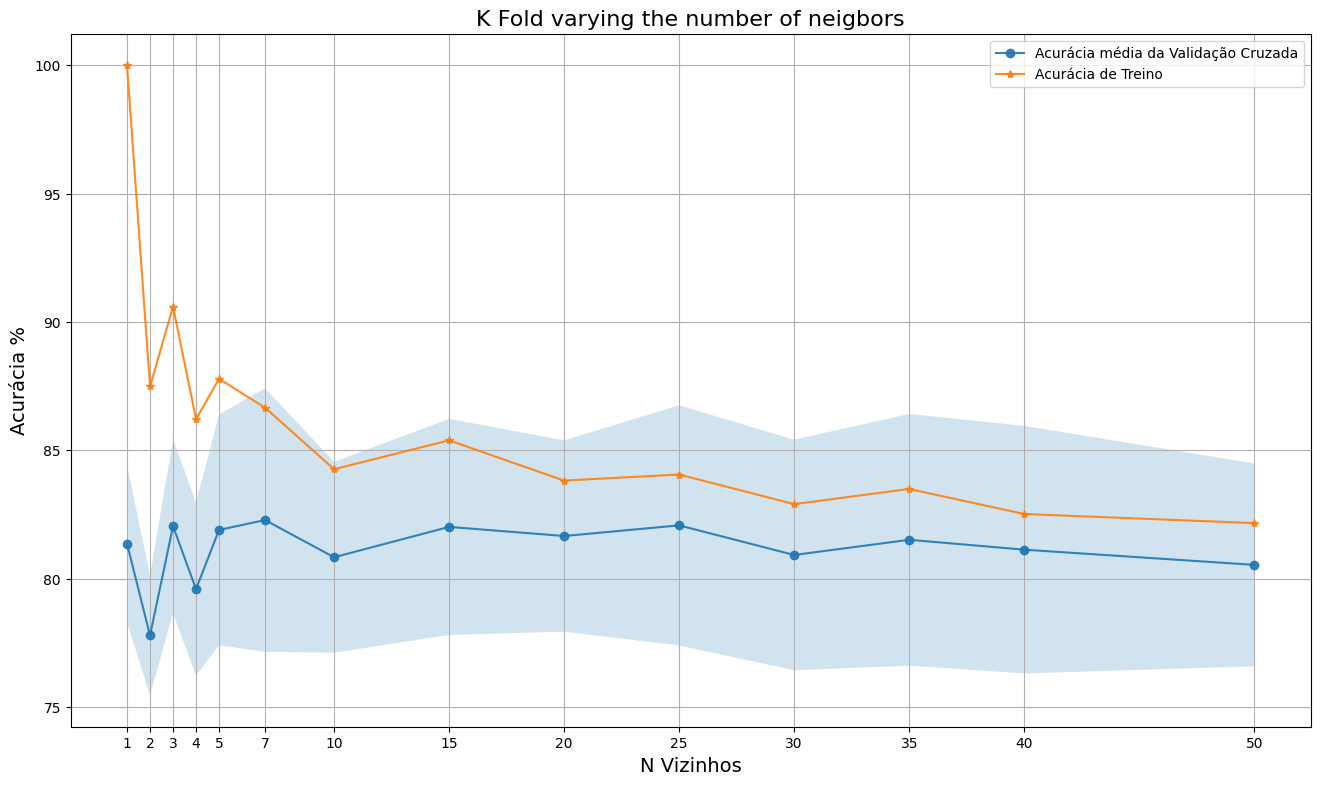

In [85]:
plot_cross_validation_on_knn(n_vizinhos, cv_scores_mean, cv_scores_std, accuracy_scores, "K Fold varying the number of neigbors")

## Test

KNN Accuracy on K-fold = 5: 81.37 %
KNN Accuracy with 1 neighbors on train data: 100.00 %
KNN Accuracy with 1 neighbors on test data: 81.82 %
KNN Accuracy on K-fold = 5: 77.79 %
KNN Accuracy with 2 neighbors on train data: 87.49 %
KNN Accuracy with 2 neighbors on test data: 78.58 %
KNN Accuracy on K-fold = 5: 82.05 %
KNN Accuracy with 3 neighbors on train data: 90.59 %
KNN Accuracy with 3 neighbors on test data: 83.53 %
KNN Accuracy on K-fold = 5: 79.59 %
KNN Accuracy with 4 neighbors on train data: 86.22 %
KNN Accuracy with 4 neighbors on test data: 80.83 %
KNN Accuracy on K-fold = 5: 81.90 %
KNN Accuracy with 5 neighbors on train data: 87.78 %
KNN Accuracy with 5 neighbors on test data: 83.36 %
KNN Accuracy on K-fold = 5: 82.28 %
KNN Accuracy with 7 neighbors on train data: 86.66 %
KNN Accuracy with 7 neighbors on test data: 82.81 %
KNN Accuracy on K-fold = 5: 80.83 %
KNN Accuracy with 10 neighbors on train data: 84.27 %
KNN Accuracy with 10 neighbors on test data: 81.55 %
KNN Accura

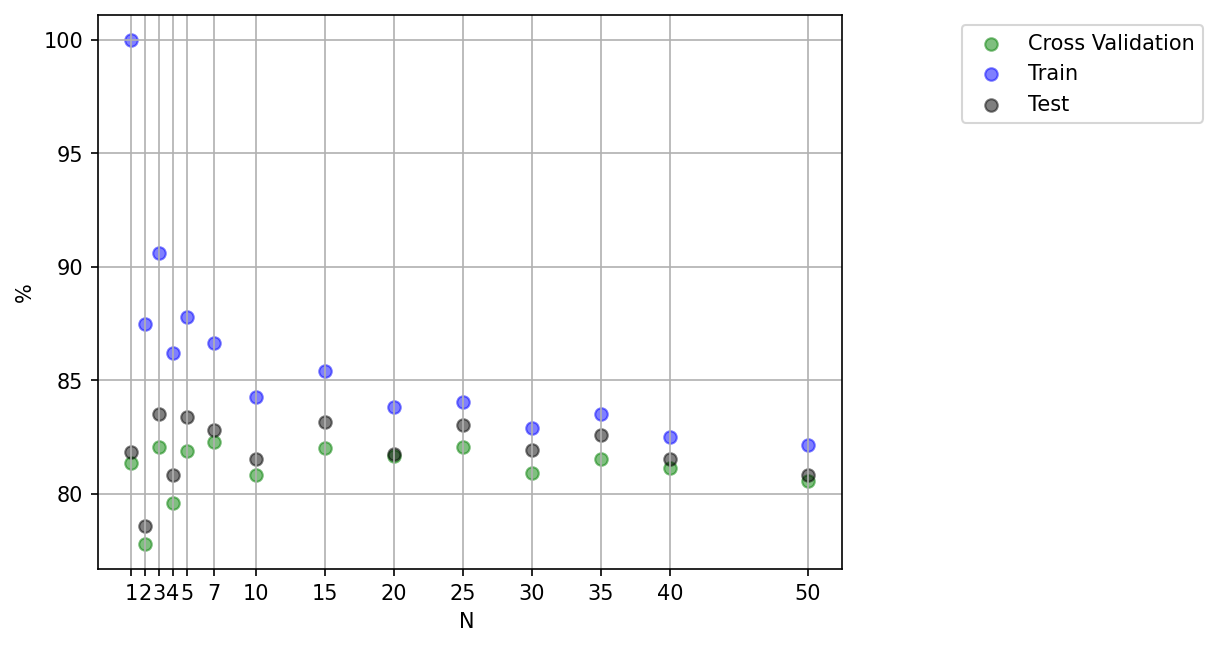

With 3 neighbors, obtain the best train accuracy =90.59% , and Test Accu =83.53 %


(3,
 90.59449866903283,
 83.52553542009885,
 array([100.        ,  87.48890861,  90.59449867,  86.21709553,
         87.78467909,  86.66075126,  84.26501035,  85.38893818,
         83.82135463,  84.05797101,  82.90446613,  83.4960071 ,
         82.51996451,  82.16503993]),
 array([81.82317408, 78.58319605, 83.52553542, 80.83470621, 83.36079077,
        82.81164195, 81.54859967, 83.14113125, 81.7682592 , 83.03130148,
        81.93300384, 82.59198243, 81.54859967, 80.83470621]))

In [86]:
knn_multi_k_cv(n_vizinhos,x_train, x_test, y_train, y_test,k_fold, scoring='accuracy')

## Precision, Recall e ROC/AUC

In [87]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [88]:

treino_temp = []
teste_temp =[]
cv_knn_temp = []

for i in range(1,25):
  cv_knn_temp.append(cross_val_score(knn_model, x_train, y_train, cv=k_fold, scoring="accuracy").mean())
  knn_model.fit(x_train,y_train)
  treino_temp.append(knn_model.score(x_train,y_train))
  y_pred = knn_model.predict(x_test)
  teste_temp.append(accuracy_score(y_test,y_pred))


In [89]:
treino_knn = np.mean(np.array(treino_temp))
test_knn = np.mean(np.array(teste_temp))
cv_knn = np.mean(np.array(cv_knn_temp))

print("KNN Accu with 20 neighbors on K-fold: {:.2f} %"
        .format(cv_knn*100))
print("KNN Accu with 20 neighbors on train = {:.3f}%".format(treino_knn*100))
print("KNN Accu with 20 neighbors on test  = {:.3f}%".format(test_knn*100))

KNN Accu with 20 neighbors on K-fold: 81.66 %
KNN Accu with 20 neighbors on train = 83.821%
KNN Accu with 20 neighbors on test  = 81.768%


In [90]:
y_pred = knn_model.predict(x_test)

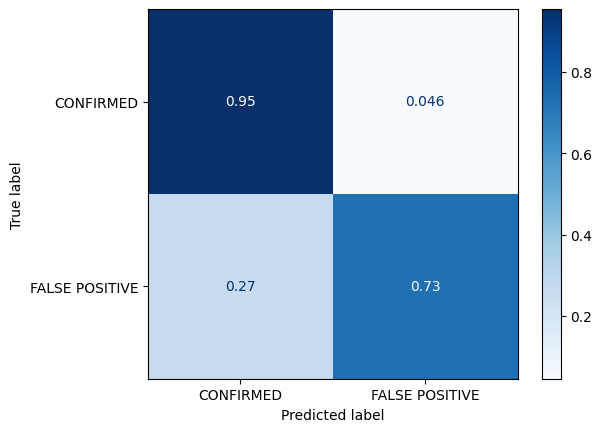

In [91]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true',cmap='Blues')
plt.show()

Recall = 0.14 % | Precision = 100.00 %


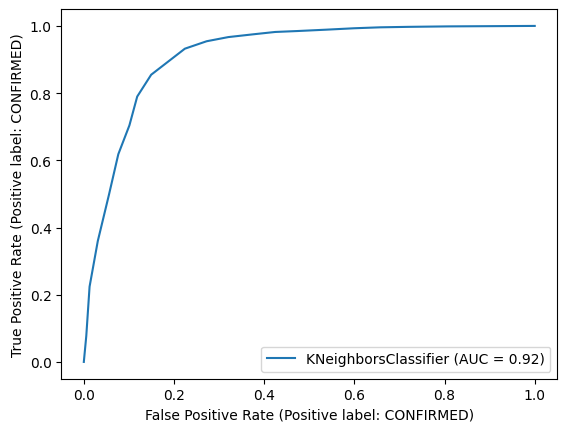

In [92]:

recall_knn = recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision_knn = precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Recall = {:.2f} % | Precision = {:.2f} %".format(recall_nb*100, precision_nb*100))

RocCurveDisplay.from_estimator(knn_model,x_test,y_test , pos_label='CONFIRMED')
plt.show()


## Conclusions

The model was quite unstable, obtaining different performances for different numbers of neighbors, which makes it difficult to analyze. For the purpose of discussion, the best test performance of the model using 20 neighbors was considered, since for this value the training and test values and cross-validation converged. When using a smaller number of neighbors, the training accuracy is higher, however, it diverges greatly from cross-validation and test accuracy.

With 20 neighbors, the best cross-validation was obtained. When running 25 tests, the following was obtained:

Accuracy of KNN with 20 neighbors in cross-validation: 81.66 %

Training accuracy obtained for KNN with 20 neighbors = 83.821%

Test accuracy obtained for KNN with 20 neighbors = 81.768%

Still using a model with 20 neighbors, a recall = 95.44 % and precision = 69.77 % was obtained. This suggests that the model can identify positive examples (high recall), however, the model makes many mistakes when classifying data as positive, i.e., it generates many false positives, as can also be seen in the confusion matrix (low precision). This also reflects in the area under the ROC curve:

Area under the ROC curve 95.7088%. This value varies greatly for each trained model.

# Random Forest

Task: Vary the number of trees and show the results graphically

The Random Forest model operates through blocks of decision trees. Its intuition stems from a concept of "The Wisdom of the Crowds". Basically, several simple decision trees are generated, each of which will provide a classification for the data, and the classification with the highest number of models predicting will be chosen.

A key point for the operation of Random Forest is the independence/low correlation between the models built. The sum of the parts of the simple models generates a more accurate model than a single more complex tree. This is due to the fact that multiple trees correct each other from individual errors, as long as they do not all err in the same direction.

Two prerequisites for random forest are defined:

The data must be separable through the attributes
The predictions and errors of each individual tree must have low correlation with the others
A procedure used to guarantee the non-correlation of the data is bagging. This method consists of letting each tree that makes up the forest withdraw samples from the dataset with replacement. This results in different trees, some with overlapping data and others not, guaranteeing distinct trees, less susceptible to variance errors.

Another procedure adopted to guarantee the generation of distinct trees is "Attribute Randomness". In this process, instead of choosing the best attribute for the node, out of all the available ones, the tree is forced to choose from a random subset of attributes, which increases the chance of obtaining distinct trees.

In this way, the final forest is composed of trees that not only were trained on distinct data subsets, but also used different attributes to make decisions.

## Implementation

In [93]:
from sklearn.ensemble import RandomForestClassifier

Let's build the model using Baging (Default) and

Number of trees: n_estimators=100(Default)

In [94]:
# cria o modelo
rf_classifier = RandomForestClassifier(bootstrap=True,random_state=seed)

# Ajusta aos dados
rf_classifier = rf_classifier.fit(x_train,y_train)

#Prediz os dados de teste
y_pred = rf_classifier.predict(x_test)

In [95]:
print("Random Forest accuracy on training data: {:.2f} %"
        .format(rf_classifier.score(x_train,y_train)*100))

Random Forest accuracy on training data: 100.00 %


In [96]:
print("Random Forest accuracy on test data: {:.2f} %"
        .format(rf_classifier.score(x_test,y_test)*100))


Random Forest accuracy on test data: 96.71 %


## Cross validation

In [97]:
def validacao_cruzada_variando_narvores(x, y, n_arvores,start=10, step= 50,cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for arvores_floresta in np.arange(start,n_arvores,step):
        forest_model = RandomForestClassifier(n_estimators=arvores_floresta, random_state=seed)
        cv_scores = cross_val_score(forest_model, x, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(forest_model.fit(x, y).score(x, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

# function for plotting cross-validation results
def plot_cross_validation_on_forests(n_arvores, cv_scores_mean, cv_scores_std, accuracy_scores):
    fig, ax = plt.subplots(1,1, figsize=(16,9))
    ax.plot(n_arvores, cv_scores_mean, '-o', label='Acurácia média da Validação Cruzada', alpha=0.9)
    ax.fill_between(n_arvores, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2) #2 desvios padrões
    ylim = plt.ylim()
    ax.plot(n_arvores, accuracy_scores, '-*', label='Acurácia de Treino', alpha=0.9)
    #ax.set_title(title, fontsize=16)
    ax.set_xlabel('Número de Árvores', fontsize=14)
    ax.set_ylabel('Acurácia', fontsize=14)
    #ax.set_ylim(ylim)
    ax.set_xticks(n_arvores)
    ax.grid()
    ax.legend()

In [98]:
# Variando numero de arvores de 1 a 101 (step=10)
start =1
n_arvores = 101
step=10

In [99]:
forest_cv_scores_mean, forest_cv_scores_std, forest_accuracy_scores = validacao_cruzada_variando_narvores(x_train, y_train, n_arvores, start,step)

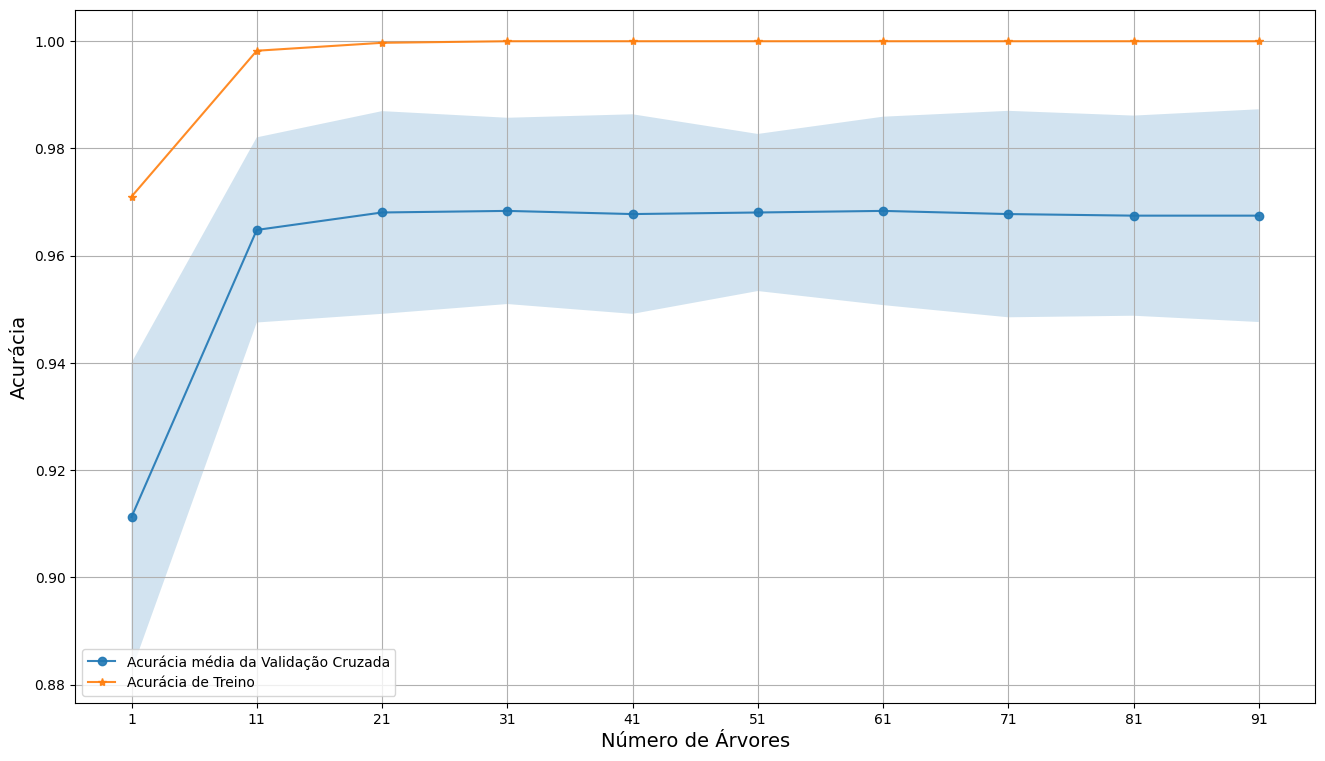

In [100]:
plot_cross_validation_on_forests(np.arange(start,n_arvores,step), forest_cv_scores_mean, forest_cv_scores_std, forest_accuracy_scores)

In [101]:
lista_arvores_floresta = []
for arvores_floresta in np.arange(start,n_arvores,step):
  lista_arvores_floresta.append(arvores_floresta)
lista_arvores_floresta

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]

In [102]:
idx_max = forest_cv_scores_mean.argmax()
sm_best_forest = lista_arvores_floresta[idx_max]
sm_best_forest_cv_score = forest_cv_scores_mean[idx_max]
sm_best_forest_cv_score_std = forest_cv_scores_std[idx_max]
print('The Forest with {} trees achieved the best average accuracy in cross-validation (K-Fold=5): {} +/- {}% on train data'.format(
      sm_best_forest, round(sm_best_forest_cv_score*100,5), round(sm_best_forest_cv_score_std*100, 5)))

The Forest with 31 trees achieved the best average accuracy in cross-validation (K-Fold=5): 96.83567 +/- 0.86844% on train data


## Aplicação nos dados de Teste

Accuracy of Random Forest with 1 trees for K-fold cross-validation = 5: 91.13 %
Accuracy of Random Forest with 1 trees for training data: 97.10 %
Accuracy of Random Forest with 1 trees for test data: 91.60 %
Accuracy of Random Forest with 11 trees for K-fold cross-validation = 5: 96.48 %
Accuracy of Random Forest with 11 trees for training data: 99.82 %
Accuracy of Random Forest with 11 trees for test data: 96.27 %
Accuracy of Random Forest with 21 trees for K-fold cross-validation = 5: 96.81 %
Accuracy of Random Forest with 21 trees for training data: 99.97 %
Accuracy of Random Forest with 21 trees for test data: 96.60 %
Accuracy of Random Forest with 31 trees for K-fold cross-validation = 5: 96.84 %
Accuracy of Random Forest with 31 trees for training data: 100.00 %
Accuracy of Random Forest with 31 trees for test data: 96.81 %
Accuracy of Random Forest with 41 trees for K-fold cross-validation = 5: 96.78 %
Accuracy of Random Forest with 41 trees for training data: 100.00 %
Accuracy 

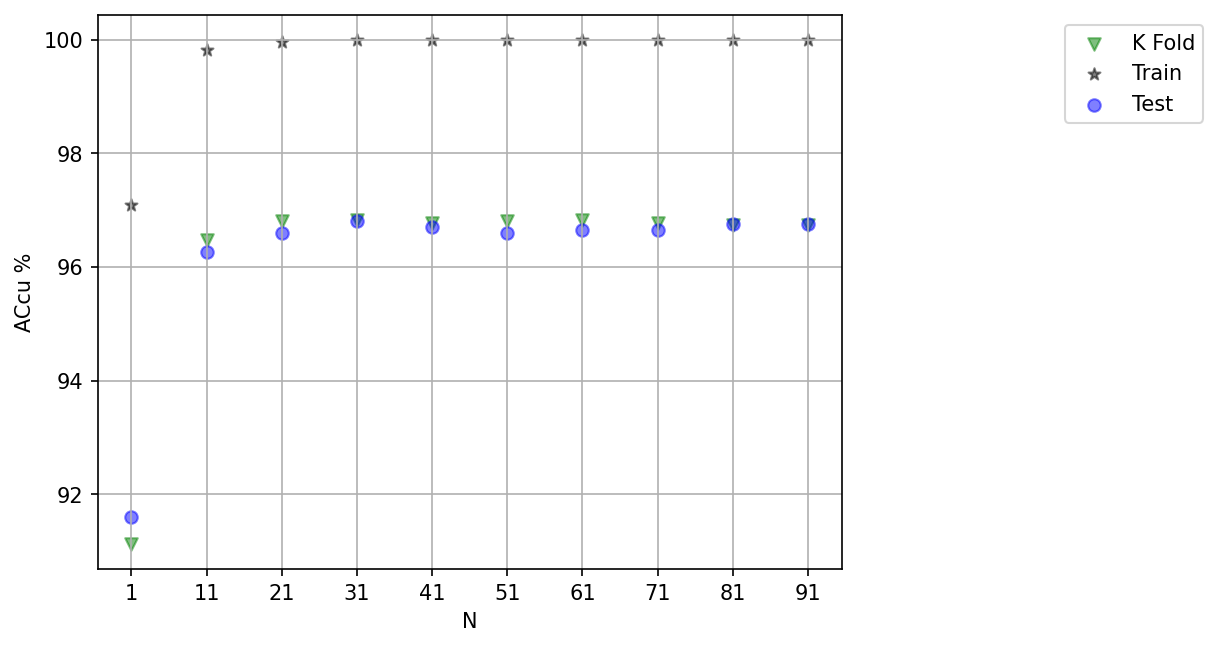

In [103]:
plt.figure(dpi=150)
labels = ["K Fold", "Train", "Test"]
markers = ["v","*","o"]
colours = ["g","k","b"]
# Variando numero de arvores de 1 a 101 (step=10)
for arvores_floresta in np.arange(start,n_arvores,step):
  forest_model = RandomForestClassifier(n_estimators=arvores_floresta, random_state=seed)

  #Validação Cruzada
  val_cruzada = cross_val_score(forest_model, x_train, y_train, cv=k_fold, scoring='accuracy').mean()*100
  print("Accuracy of Random Forest with {} trees for K-fold cross-validation = 5: {:.2f} %".format(arvores_floresta,val_cruzada))

  #Ajuste do modelo
  modelo = forest_model.fit(x_train, y_train)
  treino = forest_model.score(x_train,y_train)*100
  print("Accuracy of Random Forest with {} trees for training data: {:.2f} %".format(arvores_floresta,treino))
  #Teste
  teste = forest_model.score(x_test,y_test)*100
  print("Accuracy of Random Forest with {} trees for test data: {:.2f} %".format(arvores_floresta,teste))

  plt.scatter(arvores_floresta, val_cruzada, marker=markers[0], color=colours[0], alpha=0.5,label=labels[0])
  plt.scatter(arvores_floresta, treino, c=colours[1], alpha=0.5, marker=markers[1], label=labels[1])
  plt.scatter(arvores_floresta, teste, c=colours[2], alpha=0.5, marker=markers[2], label=labels[2])

plt.grid()
plt.legend(labels, loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
plt.xticks(np.arange(start, n_arvores, step))
plt.xlabel("N")
plt.ylabel("ACcu %")
plt.show()

## The best forest found


Although there is a small increase in training accuracy with more trees in the forest, the variation is very small, and therefore we will select a simpler model, with fewer trees. Furthermore, through cross-validation it is observed that the training accuracies are more than two standard deviations away from the average accuracy in cross-validation, so it would be a good practice to choose a simpler model to avoid greater susceptibility to overfitting.

In [104]:
# cria o modelo
rf_classifier = RandomForestClassifier(n_estimators=21, bootstrap=True,random_state=seed)

cv_rf = cross_val_score(rf_classifier, x_train, y_train, cv=k_fold, scoring='accuracy').mean()

print("Random Forest accuracy in cross-validation {:.2f} %".format(cv_rf*100))


# Ajusta aos dados
rf_classifier = rf_classifier.fit(x_train,y_train)

#Prediz os dados de teste
y_pred = rf_classifier.predict(x_test)

treino_rf = rf_classifier.score(x_train,y_train)
print("Random Forest accuracy on training data: {:.2f} %"
        .format(treino_rf*100))

test_rf = rf_classifier.score(x_test,y_test)
print("Random Forest accuracy on test data: {:.2f} %"
        .format(test_rf*100))

Random Forest accuracy in cross-validation 96.81 %
Random Forest accuracy on training data: 99.97 %
Random Forest accuracy on test data: 96.60 %


Considering the forest with 21 decision trees, the confusion matrix and ROC curve below were constructed, in addition to the Precision and Revocation metrics.

## Precision and Recall

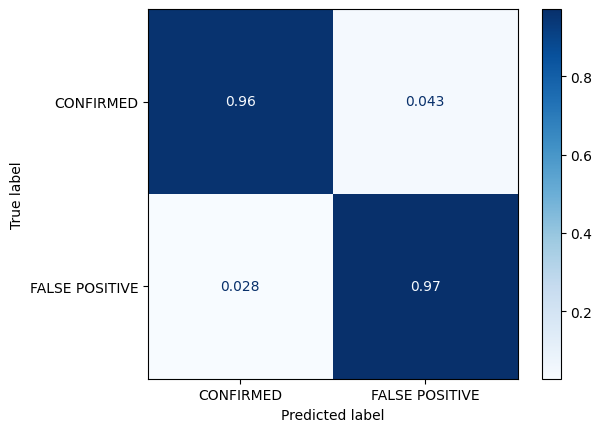

In [105]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true',cmap='Blues')
plt.show()

Recall = 0.14 % | Precision = 100.00 %


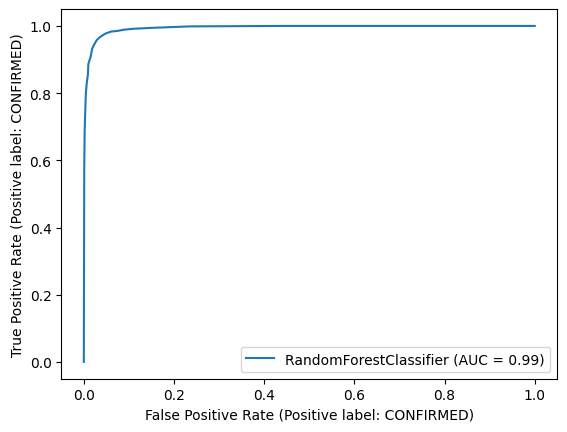

In [106]:

recall_rf = recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision_rf = precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Recall = {:.2f} % | Precision = {:.2f} %".format(recall_nb*100, precision_nb*100))

RocCurveDisplay.from_estimator(rf_classifier,x_test,y_test , pos_label='CONFIRMED')
plt.show()


## Conclusões

* Hyperparameter: Number of trees in the Forest


The forest with 71 trees achieved the best average accuracy in cross-validation (K-Fold=5): 96.86526 +/- 0.82603% on the training data

Accuracy of Random Forest with 71 trees for training data: 100.00 %

Accuracy of Random Forest with 71 trees for test data: 96.65 %

Although there is a small increase in training accuracy with more trees in the forest, the variation is very small, and therefore we selected a simpler model with fewer trees. In addition, from the cross-validation, it is observed that the training accuracies are further away than two standard deviations from the average accuracy in cross-validation, so it would be a good practice to take a simpler model to avoid greater susceptibility to overfitting.

It is observed that the accuracy values for cross-validation and test were very consistent, diverging by less than 0.25.

With 21 trees we obtain:
Accuracy of Random Forest on training data: 99.97 %

Accuracy of Random Forest on test data: 96.76 %

A recall of 95.71% and precision of 96.11% were obtained.
Area under the ROC curve 99.42%

These values suggest that the model is generalizing the data very well, without error in the training data and with little error in the tests, both in recall and precision.

# Gradient Tree Boosting  

Vary the number of iterations (N_estimators) and show the results graphically.

Gradient Tree Boosting is a machine learning algorithm that also uses ensembles, that is, the combination of simpler models to obtain better performance. The Boosting technique is related to the addition of models (trees) so that the errors of one model are corrected by the other models.

In this model, parameter updating is done using random loss functions in the individual models and gradient descent optimization.

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

## Funções auxiliares

In [108]:
def gtb_multi_cv(estimadores,x_train, x_test, y_train, y_test,cv, scoring='accuracy'):
  plt.figure(dpi=150)
  labels = ["K fold", "Train", "Test"]
  colours = ["g", "b", "k"]

  accu_treino = []
  accu_test = []
  for estimador in estimadores:
    gtb_model = GradientBoostingClassifier(n_estimators=estimador, random_state=seed)
    val_cruzada = cross_val_score(gtb_model, x_train, y_train, cv=cv).mean() *100#pega a média dos valores obtidos
    print("Accuracy of GTB cross-validation with K-fold= 5: {:.2f} %".format(val_cruzada))


    gtb_model.fit(x_train,y_train)
    treino = gtb_model.score(x_train,y_train)*100
    accu_treino.append(treino)
    print("GTB accuracy with {} estimators on training data: {:.2f} %".format(estimador, treino))

    teste = gtb_model.score(x_test,y_test)*100
    accu_test.append(teste)
    print("Accuracy of GTB with {} estimators on test data: {:.2f} %".format(estimador, teste))

    plt.scatter(estimador, val_cruzada, c=colours[0], alpha=0.5,label=labels[0])
    plt.scatter(estimador, treino, c=colours[1], alpha=0.5, label=labels[1])
    plt.scatter(estimador, teste, c=colours[2], alpha=0.5, label=labels[2])

  plt.grid()
  plt.legend(labels, loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
  plt.xticks(estimadores)
  plt.xlabel("N estimators")
  plt.ylabel("Accu %")
  plt.show()

  accu_treino = np.array(accu_treino)
  accu_test = np.array(accu_test)
  idx_max = accu_test.argmax()
  best_treino = accu_treino[idx_max]
  best_test = accu_test[idx_max]
  best_estimador = estimadores[idx_max]
  print("With {} estimators, we obtained the best test accuracy: accuTrain={:.2f}% ,AccuTest={:.2f} %".format(best_estimador,best_treino,best_test))
  return best_estimador, best_treino, best_test, accu_treino, accu_test

In [109]:
def validacao_cruzada_variando_estimadores(x_train, y_train, estimadores, cv, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for estimador in estimadores:
        gtb_model = GradientBoostingClassifier(n_estimators=estimador, random_state=seed)
        cv_scores = cross_val_score(gtb_model, x_train, y_train, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(gtb_model.fit(x_train, y_train).score(x_train, y_train))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    idx_max = cv_scores_mean.argmax()
    best_CV = cv_scores_mean[idx_max]
    best_accu = accuracy_scores[idx_max]
    best_estimador = estimadores[idx_max]
    print("With {} estimators we obtained the best cross-validation = {:.3f}% with training accuracy = {:.3f}%".format(best_estimador, best_CV*100, best_accu*100))
    return cv_scores_mean, cv_scores_std, accuracy_scores, best_estimador

In [110]:
# function for plotting cross-validation results
def plot_cross_validation_on_gtb(estimadores, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(16,9))
    ax.plot(estimadores, cv_scores_mean*100, '-o', label='Average Cross Validation Accuracy', alpha=0.9)
    ax.fill_between(estimadores, (cv_scores_mean-2*cv_scores_std)*100, (cv_scores_mean+2*cv_scores_std)*100, alpha=0.2) #2 desvios padrões
    ylim = plt.ylim()
    ax.plot(estimadores, accuracy_scores*100, '-*', label='Training Accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("N de Iter", fontsize=14)
    #ax.set_xlim(-100,1100)
    ax.set_ylabel('Accu %', fontsize=14)
    #ax.set_ylim(ylim)
    ax.set_xticks(estimadores)
    ax.grid()
    ax.legend()

## Implementação

In [111]:
gtb_model = GradientBoostingClassifier(n_estimators=100, random_state=seed) #n_estimators default=100
gtb_model.fit(x_train,y_train)
y_pred = gtb_model.predict(x_test)

print("Accuracy obtained for GTB = {:.3f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy obtained for GTB = 96.705%


## Validação Cruzada

In [112]:
estimadores = [1,10,50,100,150,200]

In [113]:
cv_scores_mean, cv_scores_std, accuracy_scores, best_vizinho = validacao_cruzada_variando_estimadores(x_train, y_train, estimadores, k_fold, scoring='accuracy')

With 100 estimators we obtained the best cross-validation = 97.161% with training accuracy = 99.290%


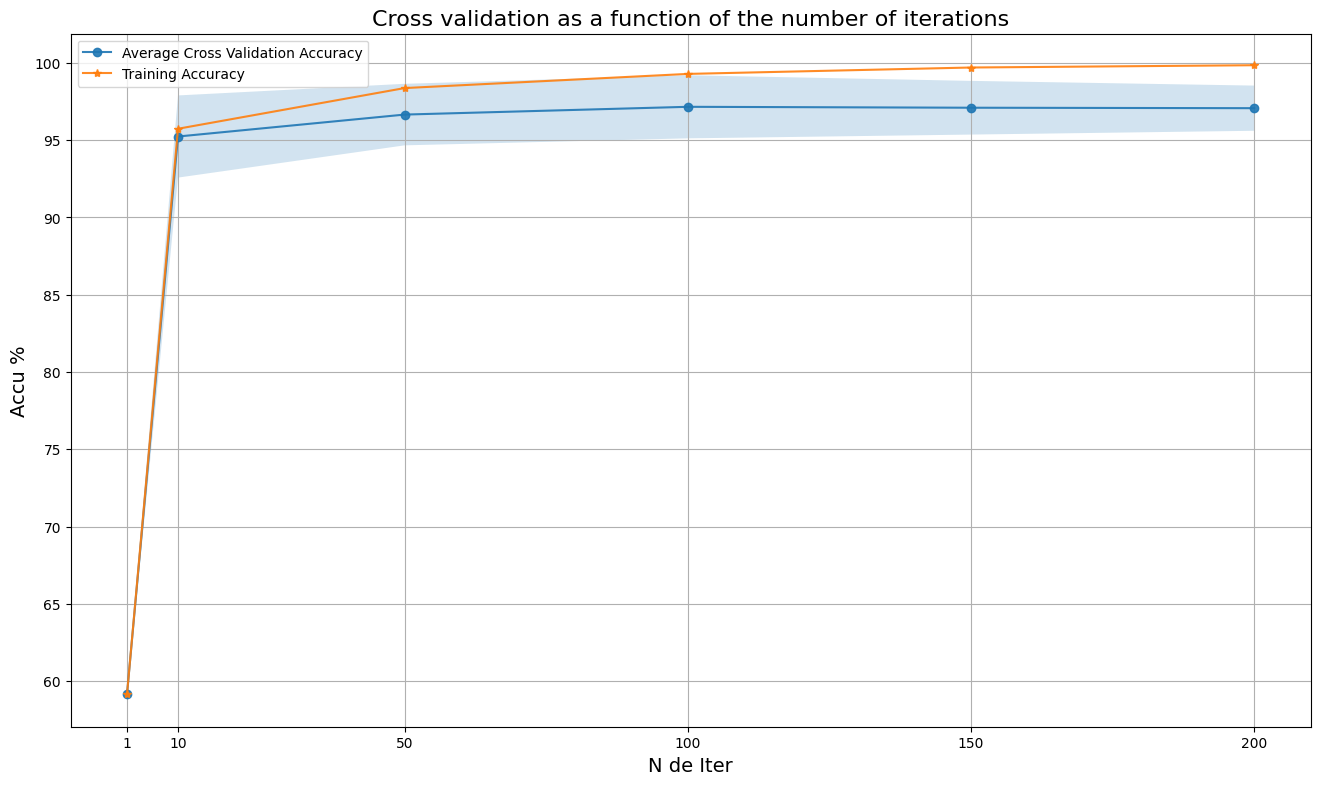

In [114]:
plot_cross_validation_on_gtb(estimadores, cv_scores_mean, cv_scores_std, accuracy_scores, "Cross validation as a function of the number of iterations")

## Test

Accuracy of GTB cross-validation with K-fold= 5: 59.15 %
GTB accuracy with 1 estimators on training data: 59.15 %
Accuracy of GTB with 1 estimators on test data: 60.30 %
Accuracy of GTB cross-validation with K-fold= 5: 95.24 %
GTB accuracy with 10 estimators on training data: 95.74 %
Accuracy of GTB with 10 estimators on test data: 95.33 %
Accuracy of GTB cross-validation with K-fold= 5: 96.66 %
GTB accuracy with 50 estimators on training data: 98.37 %
Accuracy of GTB with 50 estimators on test data: 96.54 %
Accuracy of GTB cross-validation with K-fold= 5: 97.16 %
GTB accuracy with 100 estimators on training data: 99.29 %
Accuracy of GTB with 100 estimators on test data: 96.71 %
Accuracy of GTB cross-validation with K-fold= 5: 97.10 %
GTB accuracy with 150 estimators on training data: 99.70 %
Accuracy of GTB with 150 estimators on test data: 96.98 %
Accuracy of GTB cross-validation with K-fold= 5: 97.07 %
GTB accuracy with 200 estimators on training data: 99.85 %
Accuracy of GTB with 2

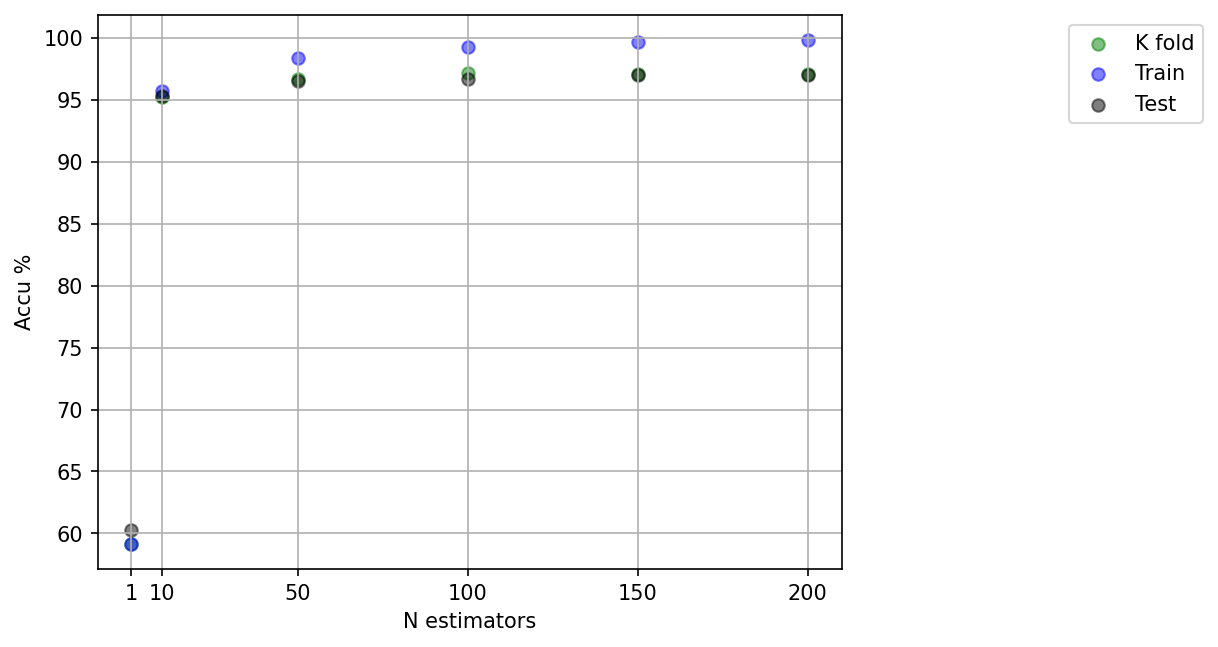

With 150 estimators, we obtained the best test accuracy: accuTrain=99.70% ,AccuTest=96.98 %


In [115]:
best_estimador, best_treino, best_test, accu_treino, accu_test = gtb_multi_cv(estimadores,x_train, x_test, y_train, y_test,k_fold, scoring='accuracy')

## Precision, Recall e ROC/AUC

Although the model with the highest accuracy has 125 estimators, we will adopt a model with 50 estimators, since training accuracies remain within two standard deviations of the cross-validation value and are closer to the values obtained from testing. Furthermore, above 50 estimators, there was little performance improvement, so it is recommended to choose a simpler model

In [116]:
best_estimador, best_treino, best_test

(150, 99.70422951789412, 96.9796814936848)

Considering GTB with 50 estimators

In [117]:
gtb_model = GradientBoostingClassifier(n_estimators=50, random_state=seed)

cv_gtb = cross_val_score(gtb_model, x_train, y_train, cv=k_fold, scoring="accuracy").mean()
print("Cross Validation Accuracy obtained for GTB with 50 estimators = {:.3f}%"
        .format(cv_gtb*100))

gtb_model.fit(x_train,y_train)
y_pred = gtb_model.predict(x_test)

treino_gtb = gtb_model.score(x_train,y_train)
print("Training accuracy obtained for GTB with 50 estimators = {:.3f}%".format(treino_gtb*100))

test_gtb = gtb_model.score(x_test,y_test)
print("Test accuracy obtained for GTB with 50 estimators  = {:.3f}%".format(test_gtb*100))

Cross Validation Accuracy obtained for GTB with 50 estimators = 96.658%
Training accuracy obtained for GTB with 50 estimators = 98.373%
Test accuracy obtained for GTB with 50 estimators  = 96.540%


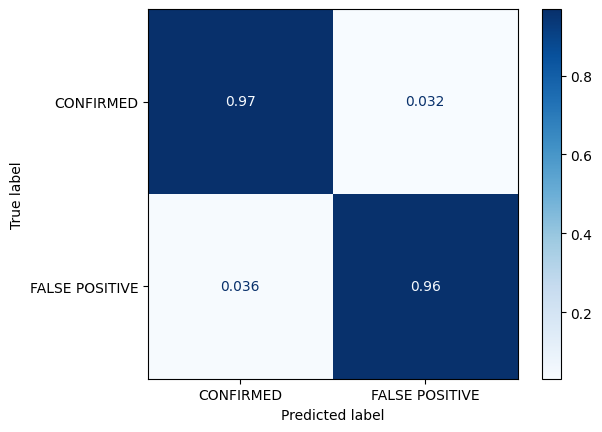

In [118]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true',cmap='Blues')
plt.show()

Recall = 0.14 % | Precision = 100.00 %


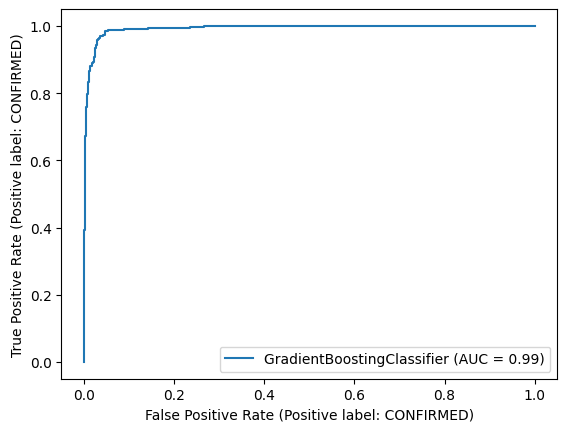

In [119]:
recall_gtb = recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision_gtb = precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Recall = {:.2f} % | Precision = {:.2f} %".format(recall_nb*100, precision_nb*100))

RocCurveDisplay.from_estimator(gtb_model,x_test,y_test , pos_label='CONFIRMED')
plt.show()


## Conclusões

Between 10 and 125 estimators used, there is an increase in the performance of the model. When this value is exceeded, the training and cross-validation/test accuracies begin to diverge, suggesting that the model is being overfitted.

With 125 estimators, the best cross-validation was obtained = 97.220% with training accuracy = 99.527%

Although there is an increase in accuracy above 50 estimators, there is little improvement, and the training accuracy begins to diverge, exceeding 2 standard deviations of distance from the cross-validation, becoming more prone to overfitting.

Therefore, a model with 50 estimators was adopted:

Training accuracy obtained for GTB with 50 estimators = 98.285%

Test accuracy obtained for GTB with 50 estimators = 96.485%

The values obtained for precision and recall suggest that the model is well-adjusted with 50 estimators, obtaining values above 94%, indicating that the model identifies the positive examples and is correct in classifying as positive, resulting in an AUC of around 99%.

A recall of 96.68% and precision of 94.59% were obtained.

Area under the ROC curve 99.2087%

# Comparação de performance

* Curva ROC - AUC
* Precisão - Precision
* Revocação - Recall

Modelos:

* Naive Bayes

* Decision Tree: Height 5

* SVM: Kernel Linear

* KNN: 20 Neighbors

* Random Forest: 21 Trees

* Gradient Tree Boosting: 50 Estimators


In [120]:
val_cruzada = np.array([cv_nb, cv_dt, cv_svmc_lin, cv_knn, cv_rf, cv_gtb])*100
acuracias_treino = np.array([treino_nb, treino_dt, treino_svmc_lin, treino_knn, treino_rf, treino_gtb])*100
acuracias_teste = np.array([teste_nb, teste_dt, teste_svmc_lin, test_knn, test_rf, test_gtb])*100
precisao = np.array([precision_nb, precision_dt, precision_svmc_lin, precision_knn, precision_rf, precision_gtb])*100
revogacao = np.array([recall_nb, recall_dt, recall_svmc_lin, recall_knn, recall_rf, recall_gtb])*100

The particularities of each model were discussed in their own section.

The table below shows a summary of the Accuracy values in Cross-validation, Training, Testing, Precision, Revocation and Area under the ROC curve.

In [121]:
modelos = ["NB", "DT", "SVM", "KNN", "RF", "GTB"]

In [124]:
df = pd.DataFrame({
    "Cross Val" : val_cruzada,
    "Accuracy Train"   : acuracias_treino,
    "Accuracy Test"    : acuracias_teste,
    "Precision"         : precisao,
    "Recall"            : revogacao,
})

df.rename(index={0: modelos[0], 1: modelos[1], 2: modelos[2], 3:modelos[3], 4:modelos[4], 5:modelos[5]}, inplace=True)
df

Cross Val  Accuracy Train  Accuracy Test   Precision     Recall
NB   91.718598       91.422656      91.213619  100.000000   0.138313
DT   94.587984       95.918367      94.453597   89.168766  97.925311
SVM  94.942751       95.622597      94.892916   90.909091  96.818811
KNN  81.662967       83.821355      81.768259   69.767442  95.435685
RF   96.806176       99.970423      96.595277   95.712310  95.712310
GTB  96.658159       98.373262      96.540362   94.594595  96.818811

In [125]:
classificadores = [classifier_gnb, Dtree_clf, svmc_classifier_lin, knn_model, rf_classifier, gtb_model]

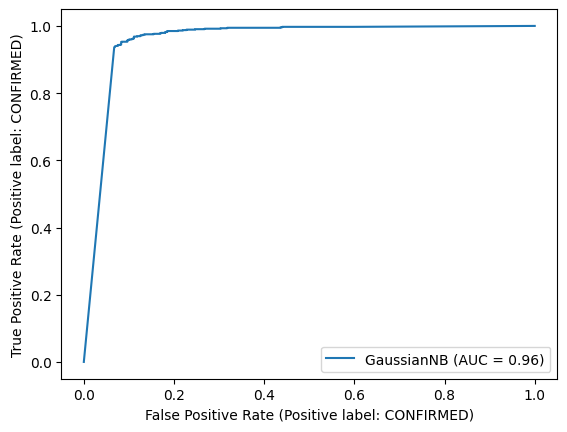

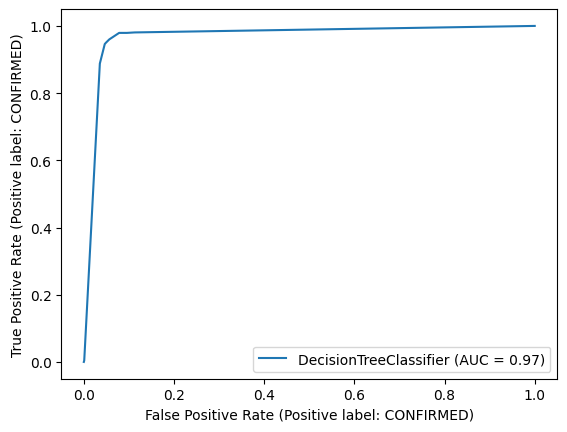

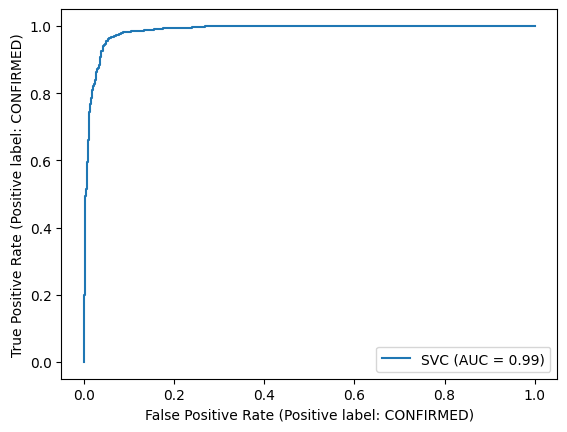

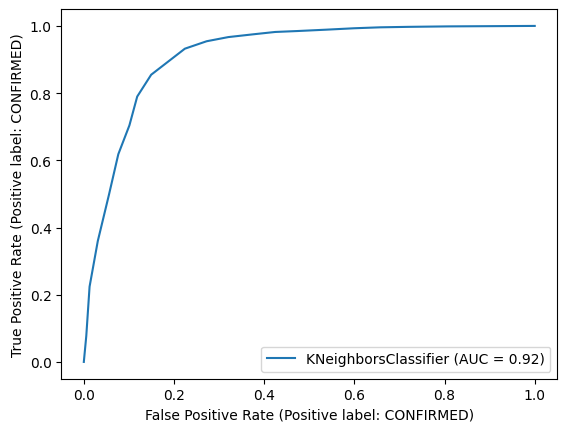

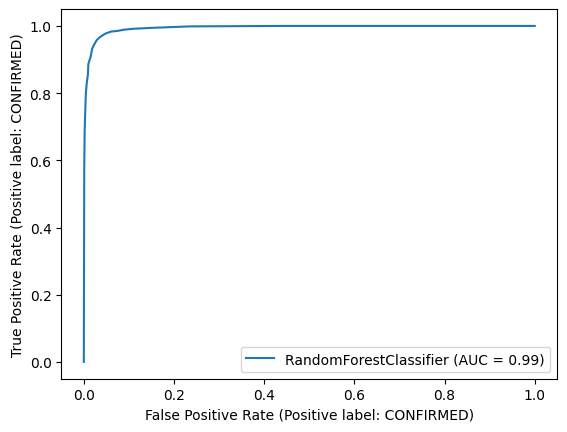

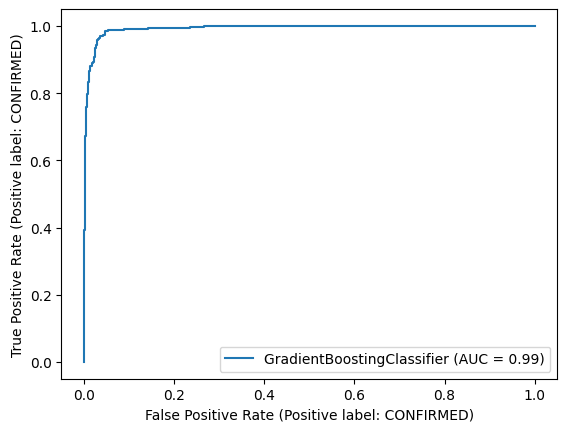

In [126]:
for i in classificadores:
  RocCurveDisplay.from_estimator(i,x_test,y_test , pos_label='CONFIRMED')
  plt.show()